In [3]:
# !pip install backtrader
# !pip install git+https://github.com/backtrader2/backtrader.git#egg=backtrader
!pip install yfinance


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
!pip install TA_Lib-0.4.24-cp38-cp38-win_amd64.whl
# https://blog.quantinsti.com/install-ta-lib-python/
# see installation guide for details

Processing c:\users\kenny\onedrive - hkust connect\documents\projects\algo trade\algorithmic-trading-python\starter_files\ta_lib-0.4.24-cp38-cp38-win_amd64.whl



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
!pip install mpl_finance

  Using cached mpl_finance-0.10.1-py3-none-any.whl (8.4 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
!pip install --upgrade mplfinance

     --------------------------------------- 73.1/73.1 kB 59.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
import backtrader as bt
import yfinance as yf

# symbol = 'AAPL'
symbol = 'BTC-USD'


In [8]:
import yfinance as yf
data = yf.download("BTC-USD",start='2023-04-01',interval="15m")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-01 00:00:00+00:00,28473.332031,28495.222656,28458.333984,28495.222656,28495.222656,2287616
2023-04-01 00:15:00+00:00,28494.214844,28546.123047,28484.412109,28492.980469,28492.980469,15153152
2023-04-01 00:30:00+00:00,28494.226562,28495.753906,28433.166016,28451.976562,28451.976562,0
2023-04-01 00:45:00+00:00,28449.363281,28449.363281,28424.826172,28434.339844,28434.339844,0
2023-04-01 01:00:00+00:00,28436.593750,28452.601562,28415.210938,28438.757812,28438.757812,0


In [9]:
import sys
# setting path
sys.path.append('C:/Users/Kenny/OneDrive - HKUST Connect/Documents/Projects/Algo trade')

In [6]:
from datetime import datetime
import backtrader as bt
from matplotlib import pyplot as plt
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        # pfast=10,  # period for the fast moving average
        # pslow=30   # period for the slow moving average

        pfast=25,  # period for the fast moving average
        pslow=99   # period for the slow moving average
    )

    def __init__(self):
        # sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        # sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        sma1 = bt.ind.EMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.EMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        # if not self.position:  # not in the market
        if self.crossover > 0:  # if fast crosses slow to the upside
            self.buy(size=100)  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.sell(size=100)  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
# data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2020, 1, 1), todate=datetime(2020, 12, 31))
# data = bt.feeds.PandasData(dataname=yf.download('BTC-USD', '2023-03-25', '2023-03-26'))
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2020, 1, 1),
#                                  todate=datetime(2022, 12, 31))
data =  bt.feeds.PandasData(dataname=yf.download("BTC-USD",start='2023-04-01',interval="15m"))
# data.head()

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
# cerebro.plot()  # and plot it with a single command
# plt.savefig("results_btc.png")
# Default position size
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
# Run Cerebro Engine
start_portfolio_value = 10000
# cerebro.broker.getvalue()
cerebro.run()  # run it all
end_portfolio_value = cerebro.broker.getvalue()
pnl = end_portfolio_value - start_portfolio_value
print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
print(f'Final Portfolio Value: {end_portfolio_value:2f}')
print(f'PnL: {pnl:.2f}')

NameError: name 'yf' is not defined

In [7]:
# https://finance.yahoo.com/quote/AAPL/history
# !pip install yfinance
import backtrader as bt
import yfinance as yf
class ImprovedMovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast', 10),
        ('slow', 30),
        ('spread_threshold',0.01),
        ('size_threshold',2)
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.fast
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.slow
        )

    def next(self):
        if self.fast_ma > self.slow_ma:
            spread = self.data.ask - self.data.bid
            size = self.data.volume
            if spread < self.params.spread_threshold and size > self.params.size_threshold:
                if not self.position:
                    self.buy(size=100)
        elif self.fast_ma < self.slow_ma:
            if self.position:
                self.sell(size=100)

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(ImprovedMovingAverageCrossStrategy, spread_threshold=0.05, size_threshold=100)
    # data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2020, 1, 1), todate=datetime(2020, 12, 31))
    data = bt.feeds.PandasData(dataname=yf.download('TSLA', '2018-01-01', '2019-01-01'))
    cerebro.adddata(data)
    cerebro.run()
    cerebro.plot()


[*********************100%***********************]  1 of 1 completed


AttributeError: 'Lines_LineSeries_DataSeries_OHLC_OHLCDateTime_Abst' object has no attribute 'ask'

In [ ]:
# https://finance.yahoo.com/quote/AAPL/history
# !pip install yfinance
import backtrader as bt
import yfinance as yf

class ImprovedMovingAverageCrossStrategy(bt.Strategy):
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )
    def __init__(self):
        self.fast_ma = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        self.slow_ma = bt.ind.SMA(period=self.p.pslow)  # slow moving average

    def next(self):
        if self.fast_ma > self.slow_ma:
            spread = self.data.high - self.data.low
            # self.datas.ask - self.datas.bid
            size = self.data.volume
            if spread < 0.05 and size > 100:
                if not self.position:
                    self.buy(size=100)
        elif self.fast_ma < self.slow_ma:
            if self.position:
                self.sell(size=100)

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    # data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2020, 1, 1), todate=datetime(2020, 12, 31))
    data = bt.feeds.PandasData(dataname=yf.download('AAPL', '2018-01-01', '2022-12-31'))
    cerebro.adddata(data)
    # cerebro.addstrategy(ImprovedMovingAverageCrossStrategy)  # Add the trading strategy
    cerebro.addstrategy(SmaCross)
    # cerebro.plot(iplot=False)  # and plot it with a single command
    # Default position size
    cerebro.addsizer(bt.sizers.SizerFix, stake=3)
    # Run Cerebro Engine
    start_portfolio_value = cerebro.broker.getvalue()
    cerebro.run()  # run it all
    end_portfolio_value = cerebro.broker.getvalue()
    pnl = end_portfolio_value - start_portfolio_value
    print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    print(f'PnL: {pnl:.2f}')
    # cerebro.plot(iplot=False)  # and plot it with a single command

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.000000
Final Portfolio Value: 7437.500000
PnL: -2562.50


In [ ]:
from datetime import datetime
import backtrader as bt
from matplotlib import pyplot as plt
# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        # pfast=10,  # period for the fast moving average
        # pslow=30   # period for the slow moving average

        pfast=25,  # period for the fast moving average
        pslow=99   # period for the slow moving average
    )

    def __init__(self):
        # sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        # sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        sma1 = bt.ind.EMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.EMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download('MSFT', '2022-01-01', '2022-01-31'))
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy

# Default position size
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
# Run Cerebro Engine
start_portfolio_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
end_portfolio_value = cerebro.broker.getvalue()
pnl = end_portfolio_value - start_portfolio_value
print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
print(f'Final Portfolio Value: {end_portfolio_value:2f}')
print(f'PnL: {pnl:.2f}')
cerebro.plot(iplot=False)  # and plot it with a single command

[*********************100%***********************]  1 of 1 completed


IndexError: array assignment index out of range

In [ ]:
from datetime import datetime
import backtrader as bt
import matplotlib
matplotlib.use('Qt5Agg')
plt.switch_backend('Qt5Agg')
from backtrader.strategies import *


# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.PandasData(dataname=yf.download('MSFT', '2011-01-01', '2012-12-31'))
# data = bt.feeds.YahooFinanceData(dataname='MSFT',
#                                  fromdate=datetime(2011, 1, 1),
#                                  todate=datetime(2012, 12, 31))

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy

# Default position size
cerebro.addsizer(bt.sizers.SizerFix, stake=3)
# Run Cerebro Engine
start_portfolio_value = cerebro.broker.getvalue()
cerebro.run()  # run it all
end_portfolio_value = cerebro.broker.getvalue()
pnl = end_portfolio_value - start_portfolio_value
print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
print(f'Final Portfolio Value: {end_portfolio_value:2f}')
print(f'PnL: {pnl:.2f}')
cerebro.plot(iplot=False)  # and plot it with a single command

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 10000.000000
Final Portfolio Value: 9991.720005
PnL: -8.28


[[<Figure size 432x288 with 5 Axes>]]

In [ ]:
# Code dumps
data = bt.feeds.YahooFinanceCSVData(dataname='TSLA.csv') #when the data is locally available

import datetime
import backtrader as bt
from strategies import *

cerebro = bt.Cerebro(optreturn=False)

#Set data parameters and add to Cerebro
data = bt.feeds.YahooFinanceCSVData(
    dataname='TSLA.csv',
    fromdate=datetime.datetime(2016, 1, 1),
    todate=datetime.datetime(2017, 12, 25))
    #settings for out-of-sample data
    #fromdate=datetime.datetime(2018, 1, 1),
    #todate=datetime.datetime(2019, 12, 25))

cerebro.adddata(data)

#Add strategy to Cerebro
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')
cerebro.optstrategy(MAcrossover, pfast=range(5, 20), pslow=range(50, 100))  

#Default position size
cerebro.addsizer(bt.sizers.SizerFix, stake=3)

if __name__ == '__main__':
    optimized_runs = cerebro.run()

    final_results_list = []
    for run in optimized_runs:
        for strategy in run:
            PnL = round(strategy.broker.get_value() - 10000,2)
            sharpe = strategy.analyzers.sharpe_ratio.get_analysis()
            final_results_list.append([strategy.params.pfast, 
                strategy.params.pslow, PnL, sharpe['sharperatio']])

    sort_by_sharpe = sorted(final_results_list, key=lambda x: x[3], 
                             reverse=True)
    for line in sort_by_sharpe[:5]:
        print(line)

In [17]:
import backtrader as bt
import yfinance as yf
from sklearn.linear_model import LinearRegression
from textblob import TextBlob #NLP
import datetime

class AgentBasedMovingAverageCrossStrategy(bt.Strategy):
    params = (
        ('fast', 10),
        ('slow', 30),
        ('spread_threshold', 0.05),
        ('size_threshold', 100),
        # ('sentiment_threshold', 0.5)
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.fast
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
        self.data.close, period=self.params.slow
        )
        self.reg = LinearRegression()
    def next(self):
        
        # # Market Sentiment Metric
        # sentiment = TextBlob(self.data.news).sentiment.polarity
        
        if self.fast_ma > self.slow_ma:
            spread = self.data.high - self.data.low
            size = self.data.volume
            if spread < self.params.spread_threshold and size > self.params.size_threshold :
                if not self.position:
                    self.buy(size=100)
        elif self.fast_ma < self.slow_ma:
            if self.position:
                self.sell(size=100)
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(AgentBasedMovingAverageCrossStrategy)
    # data = bt.feeds.YahooFinanceData(dataname='AAPL', fromdate=datetime(2020, 1, 1), todate=datetime(2020, 12, 31))
    # Create a data feed
    data = bt.feeds.PandasData(dataname=yf.download('MSFT', '2020-01-01', '2020-12-31'))
    print(data)
    # cerebro.adddata(data)

    # # Default position size
    # cerebro.addsizer(bt.sizers.SizerFix, stake=3)
    # # Run Cerebro Engine
    # start_portfolio_value = cerebro.broker.getvalue()
    # cerebro.run()  # run it all
    # end_portfolio_value = cerebro.broker.getvalue()
    # pnl = end_portfolio_value - start_portfolio_value
    # print(f'Starting Portfolio Value: {start_portfolio_value:2f}')
    # print(f'Final Portfolio Value: {end_portfolio_value:2f}')
    # print(f'PnL: {pnl:.2f}')
    # cerebro.plot(iplot=False)  # and plot it with a single command


c:\Users\Kenny\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


[*********************100%***********************]  1 of 1 completed


In [2]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


You should consider upgrading via the 'c:\users\kenny\anaconda3\python.exe -m pip install --upgrade pip' command.


In [22]:
import requests
import json 

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=1FYOEOJ5OMMGM9U9'
r = requests.get(url)
data = r.json()

# print(data)
json_formatted_str = json.dumps(data, indent=2)
print(json_formatted_str)

{
  "Meta Data": {
    "1. Information": "Intraday (5min) open, high, low, close prices and volume",
    "2. Symbol": "IBM",
    "3. Last Refreshed": "2023-01-25 20:00:00",
    "4. Interval": "5min",
    "5. Output Size": "Compact",
    "6. Time Zone": "US/Eastern"
  },
  "Time Series (5min)": {
    "2023-01-25 20:00:00": {
      "1. open": "137.9100",
      "2. high": "138.0000",
      "3. low": "137.9100",
      "4. close": "137.9800",
      "5. volume": "5218"
    },
    "2023-01-25 19:55:00": {
      "1. open": "138.0000",
      "2. high": "138.0000",
      "3. low": "137.9001",
      "4. close": "137.9001",
      "5. volume": "2402"
    },
    "2023-01-25 19:50:00": {
      "1. open": "138.0000",
      "2. high": "138.0000",
      "3. low": "137.9800",
      "4. close": "137.9800",
      "5. volume": "2923"
    },
    "2023-01-25 19:45:00": {
      "1. open": "137.9300",
      "2. high": "138.0000",
      "3. low": "137.9200",
      "4. close": "138.0000",
      "5. volume": "2487

In [37]:
import requests
import json 
import numpy as np
import pandas as pd
import io
from io import StringIO

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&outputsize=full&apikey=1FYOEOJ5OMMGM9U9'
r = requests.get(url)
wrapped_data = np.genfromtxt(io.BytesIO(r.encoding))
df = pd.read_csv(wrapped_data)


# data_str = r.decode('utf-8')
# data_dict = json.loads(data_str)
# df = pd.DataFrame(["Time Series (5min)"])
# df = df.T




# # print(data)
# json_formatted_str = json.dumps(data, indent=2)

# print(json_formatted_str)

# data = bt.feeds.PandasData(json_formatted_str)

TypeError: a bytes-like object is required, not 'str'

In [16]:
# Features functions
import numpy as np

def calculate_sma(values, period):
    """
    Calculates the Simple Moving Average (SMA) for a given list of values and period.

    Args:
        values (list, np.ndarray): List or numpy array of values.
        period (int): Period for which to calculate the SMA.

    Returns:
        np.ndarray: Numpy array of SMA values.
    """
    if len(values) < period:
        raise ValueError("Number of values is less than the specified period.")

    sma_values = np.convolve(values, np.ones((period,))/period, mode='valid')
    sma_values = np.concatenate(([None]*(period-1), sma_values))
    return sma_values

import numpy as np

def calculate_ema(values, period):
    """
    Calculates the Exponential Moving Average (EMA) for a given list of values and period.

    Args:
        values (list, np.ndarray): List or numpy array of values.
        period (int): Period for which to calculate the EMA.

    Returns:
        np.ndarray: Numpy array of EMA values.
    """
    if len(values) < period:
        raise ValueError("Number of values is less than the specified period.")

    alpha = 2 / (period + 1)
    ema_values = [None]
    for i in range(1, len(values)):
        if ema_values[-1] is None:
            ema = values[i]
        else:
            ema = alpha * values[i] + (1 - alpha) * ema_values[-1]
        ema_values.append(ema)
    return np.array(ema_values)

import numpy as np
import pandas as pd
import math

def calculate_macd(values, short_period=12, long_period=26, signal_period=9):
    """
    Calculates the Moving Average Convergence Divergence (MACD) for a given list of values.

    Args:
        values (list, np.ndarray): List or numpy array of values.
        short_period (int): Short period for calculating the MACD. Default is 12.
        long_period (int): Long period for calculating the MACD. Default is 26.
        signal_period (int): Signal period for calculating the MACD signal line. Default is 9.

    Returns:
        pd.DataFrame: DataFrame with MACD, signal line, and histogram values.
    """
    if len(values) < long_period:
        raise ValueError("Number of values is less than the specified long period.")

    ema_short = calculate_ema(values, short_period)
    ema_long = calculate_ema(values, long_period)

    macd_line = [0]*len(ema_long) #initialize
    for i in range(len(ema_long)):
        if ema_short[i] == None or ema_long[i] == None:
            macd_line[i] = None 
        else:
            macd_line[i] = ema_short[i] - ema_long[i]

    signal_line = calculate_ema(macd_line, signal_period)

    histogram  = [0]*len(ema_long) #initialize
    for j in range(len(ema_long)): #
        if macd_line[j] == None or signal_line[j] == None:
            histogram[j] = None 
        else: #      
            histogram[j] = macd_line[j] - signal_line[j]

    macd_data = pd.DataFrame({'macd': macd_line, 'signal': signal_line, 'histogram': histogram})
    return macd_data


def calculate_atr(data, period=14):
    """
    Calculates the Average True Range (ATR) for a given DataFrame of OHLCV data.

    Args:
        data (pd.DataFrame): DataFrame with OHLCV data.
        period (int): Period for calculating the ATR. Default is 14.

    Returns:
        pd.Series: Series with ATR values.
    """
    tr = np.maximum(
        np.maximum(data['high'] - data['low'], np.abs(data['high'] - data['close'].shift(1))),
        np.abs(data['low'] - data['close'].shift(1))
    )
    atr = tr.rolling(window=period).mean()
    return atr


def calculate_rsi(values, period=14):
    """
    Calculates the Relative Strength Index (RSI) for a given list of values.

    Args:
        values (list, np.ndarray): List or numpy array of values.
        period (int): Period for calculating the RSI. Default is 14.

    Returns:
        np.ndarray: Numpy array of RSI values.
    """
    if len(values) < period:
        raise ValueError("Number of values is less than the specified period.")

    deltas = np.diff(values)
    gains = np.where(deltas > 0, deltas, 0)
    losses = -np.where(deltas < 0, deltas, 0)
    avg_gain = np.convolve(gains, np.ones(period) / period, mode='valid')
    avg_loss = np.convolve(losses, np.ones(period) / period, mode='valid')
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    # Pad the resulting array to match the original length
    rsi = np.pad(rsi, (values.size - rsi.size, 0), mode='constant', constant_values=np.nan)

    return pd.Series(rsi)


# def calculate_rsi(values, period=14):
#     """
#     Calculates the Relative Strength Index (RSI) for a given list of values.

#     Args:
#         values (list, np.ndarray): List or numpy array of values.
#         period (int): Period for calculating RSI. Default is 14.

#     Returns:
#         pd.Series: Series with RSI values.
#     """
#     if len(values) < period:
#         raise ValueError("Number of values is less than the specified period.")

#     deltas = np.diff(values)
#     gains = np.where(deltas > 0, deltas, 0)
#     losses = -np.where(deltas < 0, deltas, 0)

#     avg_gain = np.convolve(gains, np.ones(period) / period, mode='valid')
#     avg_loss = np.convolve(losses, np.ones(period) / period, mode='valid')

#     rs = avg_gain / avg_loss
#     rsi = 100 - (100 / (1 + rs))

#     # Pad the resulting array to match the original length
#     rsi = np.pad(rsi, (values.size - rsi.size, 0), mode='constant', constant_values=np.nan)

#     return pd.Series(rsi)


def calculate_adi(data):
    """
    Calculates the Accumulation/Distribution Index (ADI) for a given DataFrame of OHLCV data.

    Args:
        data (pd.DataFrame): DataFrame with OHLCV data.

    Returns:
        pd.Series: Series with ADI values.
    """
    clv = ((data['close'] - data['low']) - (data['high'] - data['close'])) / (data['high'] - data['low'])
    adi = (clv * data['volume']).cumsum()
    return adi

def calculate_rc(values, period=1):
    """
    Calculates the Rate of Change (RC) for a given list of values.
    Args:
        values (list, np.ndarray): List or numpy array of values.
        period (int): Period for calculating the RC. Default is 1.

    Returns:
        np.ndarray: Numpy array of RC values.
    """
    if len(values) < period:
        raise ValueError("Number of values is less than the specified period.")

    rc = (values - values.shift(period)) / values.shift(period)
    return rc.values

def calculate_bollinger_bands(values, window=20, k=2):
    """
    Calculates the Bollinger Bands for a given list of values.
    Args:
        values (list, np.ndarray): List or numpy array of values.
        window (int): Window size for calculating the moving average. Default is 20.
        k (float): Number of standard deviations for calculating the upper and lower bands. Default is 2.

    Returns:
        pd.DataFrame: DataFrame with Bollinger Bands values (upper, middle, lower).
    """
    if len(values) < window:
        raise ValueError("Number of values is less than the specified window size.")

    rolling_mean = values.rolling(window=window).mean()
    rolling_std = values.rolling(window=window).std()

    upper_band = rolling_mean + (k * rolling_std)
    lower_band = rolling_mean - (k * rolling_std)

    bollinger_bands_data = pd.DataFrame({'upper': upper_band, 'middle': rolling_mean, 'lower': lower_band})
    return bollinger_bands_data




In [21]:
from alpha_vantage.timeseries import TimeSeries
from matplotlib import pyplot as plt


ts = TimeSeries(key='1FYOEOJ5OMMGM9U9',output_format='pandas')
data,meta_data = ts.get_intraday(symbol='MSFT',interval='15min',outputsize='full')
# data,meta_data = ts.get_intraday_extended(symbol='MSFT',interval='15min', slice='year1month1')
# plt.figure(1,figsize=(12,9))
# data['4. close'].plot()
# data['2. high'] 
data.columns = ['open', 'high', 'low', 'close', 'volume']

In [22]:
# Change the index name
data = data.rename_axis('datetime')

In [23]:
data.head()

,open,high,low,close,volume
datetime,,,,,
2023-04-28 20:00:00,307.20,307.5000,307.20,307.50,7816.0
2023-04-28 19:45:00,307.15,307.3500,307.15,307.26,1445.0
2023-04-28 19:30:00,307.20,307.2000,307.10,307.12,824.0
2023-04-28 19:15:00,307.10,307.1899,307.10,307.10,814.0
2023-04-28 19:00:00,307.35,307.3500,307.20,307.20,3007.0


In [24]:
import pandas as pd


# df2 = pd.read_json(data)
# print(df2)

def estimate_market_metrics(data):
    
    # metric is a dataframe containing all the metrics at each time step
    # bt needs access to the whole data
    bt.feeds.PandasData(dataname=data)
    data['sma_10'] =  calculate_sma(data['close'], period=10)
    data['sma_30'] = calculate_sma(data['close'], period=30)
    data['ema_10'] =  calculate_ema(data['close'], period=10)
    data['ema_30'] = calculate_ema(data['close'], period=30)
    data['ema_95'] = calculate_ema(data['close'], period=95)
    macd = calculate_macd(data['close'])
    data['macd'],data['macd_signal'],data['macd_histogram'] = (macd['macd']).tolist(),(macd['signal']).tolist(),(macd['histogram']).tolist() 
    data['atr'] = calculate_atr(data)
    data['adi'] = calculate_adi(data)
    data['rc'] = calculate_rc(data['close'])
    rsi = calculate_rsi(data['close'])
    data['rsi'] = rsi.tolist()

    bb = calculate_bollinger_bands(data['close'])
    data['bollinger_upper'], data['bollinger_middle'], data['bollinger_lower'] = bb['upper'], bb['middle'], bb['lower']
    
    return data

In [25]:
metrics = estimate_market_metrics(data)
metrics.tail(10)

,open,high,low,close,volume,sma_10,sma_30,ema_10,ema_30,ema_95,macd,macd_signal,macd_histogram,atr,adi,rc,rsi,bollinger_upper,bollinger_middle,bollinger_lower
datetime,,,,,,,,,,,,,,,,,,,,
2023-03-20 06:30:00,279.99,280.58,279.47,279.65,9172.0,279.121,274.69091,278.773924,275.940544,273.832385,2.068340,1.844621,0.223718,1.822771,6.061181e+07,-0.001250,86.090058,283.572967,276.36068,269.148393
2023-03-20 06:15:00,280.52,280.70,279.91,280.25,26393.0,279.263,274.984243,279.042301,276.218574,273.966085,2.062066,1.888110,0.173956,1.474557,6.060814e+07,0.002146,83.421892,283.860122,276.78275,269.705378
2023-03-20 06:00:00,280.48,280.90,280.12,280.50,7502.0,279.428,275.298577,279.307338,276.494795,274.102208,2.053595,1.921207,0.132387,1.247414,6.060795e+07,0.000892,77.226277,283.898365,277.27975,270.661135
2023-03-20 05:45:00,280.38,280.98,280.38,280.59,10013.0,279.669,275.618243,279.540549,276.759002,274.237371,2.030734,1.943113,0.087622,1.141700,6.060494e+07,0.000321,72.679510,283.675352,277.79725,271.919148
2023-03-20 05:30:00,280.50,280.50,279.97,279.97,6947.0,279.796,275.92391,279.618631,276.966163,274.3568,1.940223,1.942535,-0.002312,1.085986,6.059800e+07,-0.002210,59.852670,283.380784,278.21675,273.052716
2023-03-20 05:15:00,279.97,281.19,279.97,280.42,32536.0,280.008,276.237243,279.764334,277.188991,274.483117,1.883096,1.930647,-0.047551,1.146429,6.058946e+07,0.001607,63.683305,283.131681,278.60625,274.080819
2023-03-20 05:00:00,279.27,279.80,279.27,279.80,9010.0,280.088,276.525577,279.770819,277.357443,274.593885,1.767419,1.898001,-0.130582,1.164286,6.059847e+07,-0.002211,57.410296,282.116331,279.01850,275.920669
2023-03-20 04:45:00,277.52,279.43,277.51,279.11,7723.0,280.036,276.812243,279.65067,277.470511,274.687971,1.601606,1.838722,-0.237116,1.090000,6.060362e+07,-0.002466,57.231726,281.258953,279.27600,277.293047
2023-03-20 04:30:00,278.60,278.60,276.99,277.94,7922.0,279.823,277.042077,279.339639,277.500801,274.755722,1.360110,1.743000,-0.382890,1.200000,6.060505e+07,-0.004192,44.632768,281.058259,279.33450,277.610741


In [26]:
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, slow_length, signal_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    signal_length = int(signal_length)
    # Define strategy
    class MACDStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.macd = bt.indicators.MACD(
                period_me1=int(fast_length),
                period_me2=int(slow_length),
                period_signal=int(signal_length)
            )
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if self.macd.lines.macd[0] > self.macd.lines.signal[0]:
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if self.macd.lines.macd[0] < self.macd.lines.signal[0]:
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(MACDStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit
# , so we negate it for minimization



# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 30),
    'slow_length': (10, 60),
    'signal_length': (5, 30)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=100, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_signal_length = int(optimal_params['signal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Signal Length: {}'.format(optimal_signal_length))
print("Optimal Profit:", optimal_profit)


|   iter    |  target   | fast_l... | signal... | slow_l... |
-------------------------------------------------------------
| 1         | 0.0       | 13.64     | 24.05     | 46.67     |
| 2         | 0.0       | 5.631     | 11.36     | 44.37     |
| 3         | 0.0       | 5.34      | 21.68     | 36.7      |
| 4         | 0.0       | 13.88     | 6.297     | 37.99     |
| 5         | 0.0       | 19.12     | 19.05     | 46.72     |
| 6         | 0.0       | 13.76     | 10.61     | 56.51     |
| 7         | 0.0       | 11.99     | 5.308     | 51.44     |
| 8         | 0.0       | 22.26     | 22.11     | 44.03     |
| 9         | 0.0       | 18.45     | 9.729     | 19.99     |
| 10        | 0.0       | 14.01     | 8.108     | 30.93     |
| 11        | 0.0       | 24.13     | 25.63     | 33.01     |
| 12        | 0.0       | 21.79     | 14.86     | 15.04     |
| 13        | 0.0       | 29.56     | 25.85     | 35.37     |
| 14        | 0.0       | 6.336     | 23.05     | 55.57     |
| 15    

In [ ]:
        if self.fast_ma > self.slow_ma:
            spread = self.data.ask - self.data.bid
            size = self.data.volume
            if spread < self.params.spread_threshold and size > self.params.size_threshold:
                if not self.position:
                    self.buy(size=100)
        elif self.fast_ma < self.slow_ma:
            if self.position:
                self.sell(size=100)


    params = (
        ('fast', 10),
        ('slow', 30),
        ('spread_threshold', 0.05),
        ('size_threshold', 100),
        # ('sentiment_threshold', 0.5)
    )

    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(
            self.data.close, period=self.params.fast
        )
        self.slow_ma = bt.indicators.SimpleMovingAverage(
        self.data.close, period=self.params.slow
        )

      

In [41]:


from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, normal_length, slow_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    normal_length = int(normal_length)
    # Define strategy
    class EMAStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
            self.normal_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=normal_length)
            self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if (self.fast_ema > self.normal_ema) and (self.normal_ema > self.slow_ema):
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if (self.fast_ema < self.normal_ema) or (self.normal_ema < self.slow_ema):
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(EMAStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit
# , so we negate it for minimization



# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 10),
    'slow_length': (50, 99),
    'normal_length': (15, 50)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=100, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_normal_length = int(optimal_params['normal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Normal Length: {}'.format(optimal_normal_length))
print("Optimal Profit:", optimal_profit)


|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------
| 1         | 0.0       | 6.978     | 17.33     | 57.24     |
| 2         | 0.0       | 6.27      | 45.77     | 52.54     |
| 3         | 0.0       | 9.073     | 17.47     | 54.0      |
| 4         | 0.0       | 7.444     | 30.6      | 95.47     |
| 5         | 0.0       | 8.113     | 38.79     | 92.83     |
| 6         | 0.0       | 6.674     | 46.7      | 64.83     |
| 7         | 0.0       | 8.226     | 44.42     | 88.06     |
| 8         | 0.0       | 9.918     | 24.59     | 83.6      |
| 9         | 0.0       | 5.044     | 22.32     | 89.48     |
| 10        | 0.0       | 8.743     | 27.49     | 62.01     |
| 11        | 0.0       | 9.954     | 30.15     | 84.87     |
| 12        | 0.0       | 5.245     | 37.93     | 82.71     |
| 13        | 0.0       | 6.292     | 25.69     | 53.01     |
| 14        | 0.0       | 5.794     | 42.72     | 53.0      |
| 15    

In [40]:
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from scipy.optimize import NonlinearConstraint

def target_function(x, y):
    # Gardner is looking for the minimum, but this packages looks for maxima, thus the sign switch
    return np.cos(2*x)*np.cos(y) + np.sin(x)

# def constraint_function(x, y):
#     return np.cos(x) * np.cos(y) - np.sin(x) * np.sin(y)


def constraint_function(x, y):
    return (y**2) - (x+5), y - x


constraint_limit = 0.5

# Note that the constraint limit in case of one-dimensional constraints can be both an array of shape (1,) or a number.
constraint_lower = np.array([-0.9,0])
constraint_upper = np.array([-0.3,0.5])

constraint = NonlinearConstraint(constraint_function, constraint_lower, constraint_upper)

# constraint = NonlinearConstraint(constraint_function, 0, 1e-6)

# Bounded region of parameter space
pbounds = {'x': (0, 6), 'y': (0, 6)}

optimizer = BayesianOptimization(
    f=target_function,
    constraint=constraint,
    pbounds=pbounds,
    verbose=0, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

optimizer.maximize(
    init_points=2,
    n_iter=10,
)

print(optimizer.max)

# x - y, y-z

{'target': None, 'params': None, 'constraint': None}


In [138]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

from alpha_vantage.timeseries import TimeSeries
from matplotlib import pyplot as plt


# Define market data
# data = pd.read_csv('market_data.csv')  # Replace 'market_data.csv' with your actual market data file
ts = TimeSeries(key='1FYOEOJ5OMMGM9U9',output_format='pandas')
data,meta_data = ts.get_intraday(symbol='SOL',interval='15min',outputsize='full')
plt.figure(1,figsize=(12,9))
# data['4. close'].plot()
# data['2. high'] 
data.columns = ['open', 'high', 'low', 'close', 'volume']

<IPython.core.display.Javascript object>

In [136]:
data.head()

,open,high,low,close,volume
date,,,,,
2023-04-11 16:15:00,4.27,4.2700,4.270,4.270,1597.0
2023-04-11 16:00:00,4.27,4.2750,4.250,4.270,22434.0
2023-04-11 15:45:00,4.29,4.2900,4.265,4.265,5072.0
2023-04-11 15:30:00,4.29,4.3000,4.290,4.295,1958.0
2023-04-11 15:15:00,4.29,4.2957,4.270,4.280,13851.0


In [139]:
# Binance API information
API_KEY = ""
SECRET_KEY = ""


In [140]:
import requests
import hashlib
import hmac
import time

# Replace with your Binance API key and secret
api_key = API_KEY
api_secret = SECRET_KEY

# Define API endpoint and parameters
endpoint = 'https://api.binance.com/api/v3/klines'
params = {
    'symbol': 'BTCUSDT',  # Symbol for the trading pair (e.g., BTCUSDT for Bitcoin/USDT)
    'interval': '1d',  # Timeframe for the historical data (e.g., 1d for daily)
    'limit': 1000,  # Number of k-line data points to fetch
}

# Generate timestamp for API request
timestamp = int(time.time() * 1000)

# Create signature for API request
query_string = '&'.join([f"{k}={v}" for k, v in params.items()])
signature = hmac.new(api_secret.encode('utf-8'), query_string.encode('utf-8'), hashlib.sha256).hexdigest()

# Add API key, timestamp, and signature to headers
headers = {
    'X-MBX-APIKEY': api_key,
}

# Add signature and timestamp to params
params['timestamp'] = timestamp
params['signature'] = signature

# Send API request and parse response
response = requests.get(endpoint, headers=headers, params=params)
data = response.json()

# Extract historical k-line data from response
historical_data = data
print(historical_data)


{'code': -1104, 'msg': "Not all sent parameters were read; read '3' parameter(s) but was sent '5'."}


In [42]:
import requests
import json
import pandas as pd
import datetime as dt

In [150]:
url = 'https://api.binance.com/api/v3/klines'
symbol = 'SOLUSDT'
interval = '1h'
start = str(int(dt.datetime(2021,5,1).timestamp()*1000))
end = str(int(dt.datetime(2023,3,11).timestamp()*1000))
# end = str(int(dt.datetime(2021,8,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end}
data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
#format columns name
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2021-05-21 15:00:00,1.621580e+12,43.988,44.853,43.334,43.961,395523.220,1.621584e+12,1.739925e+07,23381.0,191280.043,8.420100e+06,0.0
2021-05-21 16:00:00,1.621584e+12,43.971,43.991,41.548,42.208,626298.313,1.621588e+12,2.666633e+07,35565.0,292485.479,1.245753e+07,0.0
2021-05-21 17:00:00,1.621588e+12,42.233,44.319,42.192,43.587,422407.631,1.621591e+12,1.830126e+07,25651.0,234529.962,1.016602e+07,0.0
2021-05-21 18:00:00,1.621591e+12,43.601,43.761,42.503,42.718,272294.858,1.621595e+12,1.177763e+07,16775.0,150364.440,6.508678e+06,0.0
2021-05-21 19:00:00,1.621595e+12,42.721,43.037,41.000,42.214,536122.868,1.621598e+12,2.246005e+07,29947.0,287728.167,1.205976e+07,0.0


In [154]:
url = 'https://api.binance.com/api/v3/klines'
symbol = 'SOLUSDT'
interval = '1h'
start = str(int(dt.datetime(2023,3,1).timestamp()*1000))
end = str(int(dt.datetime(2023,4,15).timestamp()*1000))
# end = str(int(dt.datetime(2021,8,1).timestamp()*1000))
par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end}
data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
#format columns name
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-03-21 15:00:00,1.679382e+12,22.23,22.26,21.70,21.93,337760.08,1.679386e+12,7.405082e+06,14819.0,145456.53,3.188355e+06,0.0
2023-03-21 16:00:00,1.679386e+12,21.94,22.05,21.51,21.67,316552.86,1.679389e+12,6.870090e+06,12931.0,144245.89,3.129034e+06,0.0
2023-03-21 17:00:00,1.679389e+12,21.67,22.27,21.59,22.10,309355.65,1.679393e+12,6.786922e+06,13760.0,150111.52,3.292965e+06,0.0
2023-03-21 18:00:00,1.679393e+12,22.10,22.46,22.04,22.26,267704.88,1.679396e+12,5.965281e+06,10876.0,129555.55,2.888057e+06,0.0
2023-03-21 19:00:00,1.679396e+12,22.25,22.52,22.17,22.44,218838.24,1.679400e+12,4.887965e+06,8115.0,114388.97,2.555348e+06,0.0


In [156]:
data.head()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-03-01 00:00:00,1.677600e+12,22.54,22.70,22.38,22.41,93090.04,1.677604e+12,2.095814e+06,4392.0,36131.39,8.149384e+05,0.0
2023-03-01 01:00:00,1.677604e+12,22.41,22.68,22.39,22.61,61520.80,1.677607e+12,1.387289e+06,3122.0,37736.24,8.508506e+05,0.0
2023-03-01 02:00:00,1.677607e+12,22.60,22.65,22.46,22.53,59887.83,1.677611e+12,1.350801e+06,2810.0,26493.25,5.977911e+05,0.0
2023-03-01 03:00:00,1.677611e+12,22.53,22.56,22.18,22.20,128297.66,1.677614e+12,2.862283e+06,5503.0,55156.57,1.230965e+06,0.0
2023-03-01 04:00:00,1.677614e+12,22.19,22.25,22.04,22.13,110883.92,1.677618e+12,2.455553e+06,4850.0,50791.11,1.125203e+06,0.0


In [190]:
import requests
import time

def fetch_binance_historical_data(symbol, interval, start_time, end_time):
    """
    Fetches historical k-line data from Binance API for a given symbol, interval, start time, and end time.
    
    :param symbol: str, trading pair symbol (e.g., 'BTCUSDT' for Bitcoin/USDT)
    :param interval: str, timeframe for the historical data (e.g., '1d' for daily)
    :param start_time: int, start timestamp in milliseconds
    :param end_time: int, end timestamp in milliseconds
    :return: list of dictionaries, historical k-line data
    """
    # Define API endpoint
    endpoint = 'https://api.binance.com/api/v3/klines'
    
    # Initialize empty list to store historical data
    historical_data = []
    
    # Loop until end time is reached
    while start_time < end_time:
        # Calculate remaining time until end time or maximum allowed timeframe (500 data points)

        if interval[-1] == 'h':
            interval_size = (int(interval[0]) * 60) - 1
        else:
            interval_size = int(interval[:-1])
        
        remaining_time = min(end_time - start_time, 500 * interval_size * 60 * 1000)
        
        # Define API parameters for current request
        params = {
            'symbol': symbol,
            'interval': interval,
            'startTime': start_time,
            'endTime': start_time + remaining_time,
            'limit': 500,
        }
        
        # Send API request and parse response
        response = requests.get(endpoint, params=params)
        data = response.json()

        # display(len(data)) 
        
        # Append fetched data to historical_data list
        historical_data.extend(data)
        
        # Update start time for next request
        start_time += remaining_time + (int(interval[:-1]) * 60 * 1000)
        
        # Add delay to avoid hitting API rate limits (optional)
        time.sleep(1)
    
    return historical_data


In [218]:
# hist_data = fetch_binance_historical_data(symbol = 'AXSUSDT',
#                                           interval = '1h',
#                                           start_time = int(dt.datetime(2023,3,1).timestamp()*1000),
#                                           end_time = int(dt.datetime(2023,4,13).timestamp()*1000))

hist_data = fetch_binance_historical_data(symbol = 'AXSUSDT',
                                          interval = '1h',
                                          start_time = int(dt.datetime(2023,3,1).timestamp()*1000),
                                          end_time = int(dt.datetime(2023,5,6).timestamp()*1000))

In [219]:
len(hist_data)

1584

In [220]:
data = pd.DataFrame(hist_data)
#format columns name
data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
data=data.astype(float)
data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-05-05 20:00:00,1.683288e+12,7.62,7.64,7.47,7.55,44559.89,1.683292e+12,336678.8271,1578.0,14863.18,112301.7937,0.0
2023-05-05 21:00:00,1.683292e+12,7.55,7.62,7.53,7.61,16389.72,1.683295e+12,124179.4459,484.0,9290.71,70441.7859,0.0
2023-05-05 22:00:00,1.683295e+12,7.62,7.69,7.61,7.68,36715.20,1.683299e+12,280721.0257,975.0,20826.63,159304.9533,0.0
2023-05-05 23:00:00,1.683299e+12,7.68,7.73,7.67,7.71,30138.36,1.683302e+12,232078.7388,757.0,20587.24,158573.0048,0.0
2023-05-06 00:00:00,1.683302e+12,7.72,7.81,7.71,7.77,70995.83,1.683306e+12,551780.6399,1755.0,44215.81,343750.4254,0.0


In [221]:
data[499:550]

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2023-03-21 19:00:00,1.679396e+12,8.57,8.69,8.57,8.64,84077.34,1.679400e+12,7.253029e+05,1993.0,39287.33,338728.4856,0.0
2023-03-21 20:00:00,1.679400e+12,8.65,8.85,8.60,8.83,77695.88,1.679404e+12,6.768002e+05,2660.0,35673.78,310929.6857,0.0
2023-03-21 21:00:00,1.679404e+12,8.84,8.86,8.73,8.82,130976.45,1.679407e+12,1.152235e+06,3769.0,69740.23,613772.4660,0.0
2023-03-21 22:00:00,1.679407e+12,8.82,8.90,8.68,8.73,74577.31,1.679411e+12,6.544399e+05,2956.0,36091.73,316952.9820,0.0
2023-03-21 23:00:00,1.679411e+12,8.73,8.82,8.72,8.79,23947.09,1.679414e+12,2.101870e+05,1049.0,13324.96,116966.9875,0.0
2023-03-22 00:00:00,1.679414e+12,8.78,8.89,8.74,8.85,66922.01,1.679418e+12,5.898735e+05,2084.0,27715.84,244853.8852,0.0
2023-03-22 01:00:00,1.679418e+12,8.84,8.86,8.64,8.73,76834.84,1.679422e+12,6.728620e+05,2963.0,38669.21,338610.8304,0.0
2023-03-22 02:00:00,1.679422e+12,8.74,8.74,8.58,8.63,50903.75,1.679425e+12,4.406140e+05,2078.0,20345.72,176025.2292,0.0
2023-03-22 03:00:00,1.679425e+12,8.62,8.75,8.62,8.72,26767.37,1.679429e+12,2.327132e+05,1186.0,12594.32,109476.6761,0.0
2023-03-22 04:00:00,1.679429e+12,8.72,8.87,8.72,8.82,45498.02,1.679432e+12,4.004145e+05,1851.0,26888.72,236506.1727,0.0


In [222]:
import pandas as pd


# df2 = pd.read_json(data)
# print(df2)

def extract_features(data):
    
    # metric is a dataframe containing all the metrics at each time step
    # bt needs access to the whole data
    bt.feeds.PandasData(dataname=data)
    data['sma_10'] =  calculate_sma(data['close'], period=10)
    data['sma_30'] = calculate_sma(data['close'], period=30)
    data['ema_10'] =  calculate_ema(data['close'], period=10)
    data['ema_30'] = calculate_ema(data['close'], period=30)
    data['ema_95'] = calculate_ema(data['close'], period=95)
    macd = calculate_macd(data['close'])
    data['macd'],data['macd_signal'],data['macd_histogram'] = (macd['macd']).tolist(),(macd['signal']).tolist(),(macd['histogram']).tolist() 
    data['atr'] = calculate_atr(data)
    data['adi'] = calculate_adi(data)
    data['rc'] = calculate_rc(data['close'])
    rsi = calculate_rsi(data['close'])
    data['rsi'] = rsi.tolist()

    bb = calculate_bollinger_bands(data['close'])
    data['bollinger_upper'], data['bollinger_middle'], data['bollinger_lower'] = bb['upper'], bb['middle'], bb['lower']
    
    
    return data

In [223]:
new_data = extract_features(data)
new_data.tail()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,...,macd,macd_signal,macd_histogram,atr,adi,rc,rsi,bollinger_upper,bollinger_middle,bollinger_lower
2023-05-05 20:00:00,1.683288e+12,7.62,7.64,7.47,7.55,44559.89,1.683292e+12,336678.8271,1578.0,14863.18,...,0.000187,0.003292,-0.003105,0.054286,1.277341e+06,-0.009186,50.000000,7.660561,7.5915,7.522439
2023-05-05 21:00:00,1.683292e+12,7.55,7.62,7.53,7.61,16389.72,1.683295e+12,124179.4459,484.0,9290.71,...,0.001141,0.002862,-0.001721,0.058571,1.290088e+06,0.007947,56.666667,7.661870,7.5940,7.526130
2023-05-05 22:00:00,1.683295e+12,7.62,7.69,7.61,7.68,36715.20,1.683299e+12,280721.0257,975.0,20826.63,...,0.007459,0.003781,0.003678,0.062143,1.317625e+06,0.009198,64.864865,7.675185,7.6005,7.525815
2023-05-05 23:00:00,1.683299e+12,7.68,7.73,7.67,7.71,30138.36,1.683302e+12,232078.7388,757.0,20587.24,...,0.014717,0.005969,0.008749,0.059286,1.327671e+06,0.003906,60.606061,7.693915,7.6085,7.523085
2023-05-06 00:00:00,1.683302e+12,7.72,7.81,7.71,7.77,70995.83,1.683306e+12,551780.6399,1755.0,44215.81,...,0.025023,0.009779,0.015243,0.060714,1.341870e+06,0.007782,65.789474,7.727754,7.6190,7.510246


In [226]:
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, normal_length, slow_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    normal_length = int(normal_length)
    # Define strategy
    class EMAStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
            self.normal_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=normal_length)
            self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if (self.fast_ema > self.normal_ema) and (self.normal_ema > self.slow_ema):
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if (self.fast_ema < self.normal_ema) or (self.normal_ema < self.slow_ema):
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(EMAStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit




# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 15),
    'slow_length': (50, 99),
    'normal_length': (15, 50)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=200, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_normal_length = int(optimal_params['normal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Normal Length: {}'.format(optimal_normal_length))
print("Optimal Profit:", optimal_profit)


|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------
| 1         | -211.7    | 9.872     | 49.05     | 59.3      |
| 2         | -211.7    | 13.75     | 43.74     | 52.08     |
| 3         | -35.99    | 7.554     | 34.15     | 72.8      |
| 4         | -237.7    | 6.2       | 37.1      | 94.64     |
| 5         | 12.74     | 10.07     | 31.22     | 82.22     |
| 6         | -38.02    | 12.3      | 43.47     | 96.2      |
| 7         | 65.41     | 13.43     | 27.11     | 92.04     |
| 8         | -211.7    | 14.01     | 38.47     | 72.37     |
| 9         | -211.7    | 14.67     | 35.84     | 73.75     |
| 10        | -115.6    | 5.481     | 18.88     | 79.96     |
| 11        | -87.5     | 5.59      | 49.98     | 80.81     |
| 12        | -223.9    | 10.36     | 42.12     | 79.08     |
| 13        | 191.1     | 8.194     | 43.46     | 87.52     |
| 14        | -64.65    | 13.82     | 33.96     | 74.65     |
| 15    

In [ ]:


from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, normal_length, slow_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    normal_length = int(normal_length)
    # Define strategy
    class EMAStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
            self.normal_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=normal_length)
            self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if (self.fast_ema > self.normal_ema) and (self.normal_ema > self.slow_ema):
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if (self.fast_ema < self.normal_ema) or (self.normal_ema < self.slow_ema):
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(EMAStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000
    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit
# , so we negate it for minimization



# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 10),
    'slow_length': (50, 99),
    'normal_length': (15, 50)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=100, init_points=50,acq='ei')
# opt.maximize(n_iter=100, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_normal_length = int(optimal_params['normal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Normal Length: {}'.format(optimal_normal_length))
print("Optimal Profit:", optimal_profit)


|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------


<ipython-input-199-aa9fa13deaeb>:67: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=100, init_points=50,acq='ei')


| 151       | -155.8    | 5.315     | 44.48     | 92.6      |
| 152       | -199.5    | 6.595     | 46.21     | 89.65     |
| 153       | -19.12    | 8.206     | 29.08     | 85.06     |
| 154       | 1.911e+03 | 5.435     | 25.02     | 65.13     |
| 155       | -27.09    | 8.167     | 37.99     | 91.56     |
| 156       | -10.97    | 6.138     | 17.25     | 81.29     |
| 157       | 1.718e+03 | 8.481     | 39.49     | 53.09     |
| 158       | 1.587e+03 | 6.544     | 32.61     | 55.67     |
| 159       | 2.119e+03 | 9.447     | 22.57     | 51.38     |
| 160       | -49.27    | 9.824     | 34.47     | 68.35     |
| 161       | -24.9     | 6.202     | 30.91     | 68.04     |
| 162       | -208.6    | 6.401     | 36.2      | 69.11     |
| 163       | 1.453e+03 | 6.931     | 18.33     | 80.22     |
| 164       | -58.3     | 9.746     | 31.12     | 81.0      |
| 165       | -54.46    | 8.746     | 44.72     | 71.5      |
| 166       | -15.39    | 5.482     | 35.95     | 64.44     |
| 167   

In [227]:
# Strategy for long trades
# Define objective function for Bayesian optimization
class OptimizationModel():
    def __init__(self,data):
        self.data = data
            
    def objective(self,fast_length, normal_length, slow_length):
        # Convert parameters to integer values
        fast_length = int(fast_length)
        slow_length = int(slow_length)
        normal_length = int(normal_length)
        # Define strategy
        class EMAStrategy(bt.Strategy):
            params = (
                ('starting_cash', 10000),
            )
        
            def __init__(self):
                self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
                self.normal_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=normal_length)
                self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
                self.stop_loss_pct = 0.02  # 2% stop loss threshold
        
            def next(self):
                if not self.position:
                    if (self.fast_ema > self.normal_ema) and (self.normal_ema > self.slow_ema):
                        # Buy signal
                        self.buy(size=self.params.starting_cash / self.data.close[0])
        
                else:
                    if (self.fast_ema < self.normal_ema) or (self.normal_ema < self.slow_ema):
                    # or \
                            # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                        # Sell signal or stop loss triggered
                        self.sell(size=self.position.size)
        
        cerebro = bt.Cerebro()
        
        # Add data to cerebro
        cerebro.adddata(bt.feeds.PandasData(dataname=self.data))
        
        # Add strategy to cerebro
        cerebro.addstrategy(EMAStrategy)
        
        # Set starting capital
        cerebro.broker.setcash(10000)
        
        # Run backtest
        results = cerebro.run()
        profit = results[0].broker.getvalue() - 10000

        # print(params)
        # print(profit)
        
        return profit  # Objective is to maximize profit

In [232]:
def optimize_ema_strategy(pairs, start_date, end_date, interval):
    """
    Fetches OHLCV data for each pair, optimizes an EMA_strategy, and returns data, optimal ema value, and profit.
    """
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    # Step 1: Fetch OHLCV data for each pair
    data_dict = {}
    for pair in pairs:
        # Use the exchange API to fetch OHLCV data for each pair
        # and store it in a Pandas DataFrame


        hist_data = fetch_binance_historical_data(symbol = pair,
                                          interval = interval,
                                          start_time = int(dt.datetime(int(start_date.year),int(start_date.month),int(start_date.day)).timestamp()*1000),
                                          end_time = int(dt.datetime(int(end_date.year),int(end_date.month),int(end_date.day)).timestamp()*1000))
        data = pd.DataFrame(hist_data)
        #format columns name
        data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
        data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
        data=data.astype(float)
        data_dict[pair] = data

    
    # Step 2: Optimize the EMA_strategy for each pair
    optimal_ema_values = {}
    profits = {}
    for pair, data in data_dict.items():   
        # Define parameter bounds for Bayesian optimization
        bounds = {
            'fast_length': (5, 15),
            'slow_length': (40, 99),
            'normal_length': (12, 50)
        }

        # Perform Bayesian optimization
        model = OptimizationModel(data)
        opt = BayesianOptimization(model.objective, bounds)
        opt.maximize(n_iter=300, init_points=50,acq='ei')

        # Extract optimal parameters
        optimal_params = opt.max['params']
        optimal_fast_length = int(optimal_params['fast_length'])
        optimal_slow_length = int(optimal_params['slow_length'])
        optimal_normal_length = int(optimal_params['normal_length'])
        optimal_profit = float(opt.max['target'])

        # Print optimal parameters
        print('Optimal Parameters:')
        print('Fast Length: {}'.format(optimal_fast_length))
        print('Slow Length: {}'.format(optimal_slow_length))
        print('Normal Length: {}'.format(optimal_normal_length))
        print("Optimal Profit:", optimal_profit)

        optimal_ema_dict = {'Fast Length':optimal_fast_length,
                            'Slow Length':optimal_slow_length,
                            'Normal Length':optimal_normal_length
        }

        optimal_ema_values[pair] = optimal_ema_dict
        profits[pair] = optimal_profit
    # Step 3: Return the data, optimal ema values, and profits for each pair
    return data_dict, optimal_ema_values, profits


In [233]:
pairs = ['BTCUSDT','SOLUSDT','1INCHUSDT','AXSUSDT','ICPUSDT','NEARUSDT','IDEXUSDT','KP3RUSDT','DGBUSDT']
start_date = '2023-03-01'
end_date = '2023-05-06'
interval = '1h'

data_dict, optimal_ema_values, profits = optimize_ema_strategy(pairs, start_date, end_date, interval)

|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------


<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 841.6     | 14.89     | 32.77     | 79.19     |
| 2         | 799.7     | 8.552     | 35.14     | 66.84     |
| 3         | 1.507e+03 | 14.69     | 49.03     | 96.15     |
| 4         | 1.722e+03 | 10.04     | 13.81     | 88.6      |
| 5         | 706.7     | 9.876     | 33.62     | 82.15     |
| 6         | 647.9     | 6.1       | 39.25     | 89.89     |
| 7         | 1.49e+03  | 14.82     | 43.84     | 57.59     |
| 8         | 549.4     | 6.927     | 37.17     | 74.72     |
| 9         | 1.776e+03 | 13.19     | 47.53     | 78.88     |
| 10        | 1.436e+03 | 13.14     | 42.86     | 65.34     |
| 11        | 1.87e+03  | 9.779     | 14.42     | 81.66     |
| 12        | 1.051e+03 | 11.2      | 38.06     | 54.29     |
| 13        | -51.08    | 14.37     | 45.57     | 44.54     |
| 14        | 1.31e+03  | 14.1      | 27.1      | 59.45     |
| 15        | 782.6     | 9.047     | 40.94     | 87.94     |
| 16        | 1.35e+03  | 13.87     | 43.81     | 53.27     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 1.823e+03 | 6.84      | 30.53     | 41.46     |
| 2         | 1.563e+03 | 11.53     | 17.48     | 64.84     |
| 3         | 1.624e+03 | 7.774     | 36.74     | 43.89     |
| 4         | -148.4    | 11.26     | 45.19     | 95.58     |
| 5         | -135.9    | 10.26     | 19.37     | 97.78     |
| 6         | -484.2    | 10.92     | 47.16     | 79.92     |
| 7         | 1.916e+03 | 12.88     | 18.48     | 53.17     |
| 8         | -54.46    | 8.253     | 39.26     | 81.77     |
| 9         | 1.523e+03 | 8.742     | 22.23     | 70.13     |
| 10        | 1.143e+03 | 11.29     | 17.56     | 85.64     |
| 11        | -568.2    | 13.29     | 16.83     | 42.09     |
| 12        | -626.4    | 11.55     | 20.27     | 41.5      |
| 13        | 1.295e+03 | 9.67      | 26.91     | 59.67     |
| 14        | -28.33    | 7.672     | 15.13     | 73.74     |
| 15        | -29.69    | 12.07     | 25.48     | 89.85     |
| 16        | -132.4    | 13.42     | 16.41     | 64.76     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -89.09    | 13.11     | 32.2      | 75.51     |
| 2         | -188.7    | 14.79     | 45.23     | 42.43     |
| 3         | -504.9    | 14.59     | 12.79     | 71.72     |
| 4         | -122.8    | 14.34     | 21.14     | 70.98     |
| 5         | -58.15    | 6.29      | 23.03     | 84.28     |
| 6         | -38.1     | 6.731     | 47.59     | 40.77     |
| 7         | -77.36    | 6.541     | 45.75     | 98.57     |
| 8         | -22.49    | 14.2      | 42.76     | 85.15     |
| 9         | -12.4     | 5.642     | 49.61     | 92.34     |
| 10        | -151.2    | 12.24     | 25.12     | 47.42     |
| 11        | -31.55    | 8.398     | 34.15     | 56.0      |
| 12        | -222.7    | 9.198     | 25.98     | 84.7      |
| 13        | -439.7    | 8.392     | 35.98     | 70.8      |
| 14        | 396.0     | 7.559     | 43.48     | 97.23     |
| 15        | -235.0    | 6.798     | 42.99     | 55.36     |
| 16        | -10.78    | 13.03     | 37.32     | 65.33     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 197.9     | 6.507     | 49.82     | 80.25     |
| 2         | -170.0    | 9.918     | 38.73     | 59.64     |
| 3         | -30.75    | 6.546     | 25.23     | 81.6      |
| 4         | -67.34    | 5.482     | 14.62     | 43.26     |
| 5         | -260.2    | 11.3      | 42.24     | 81.17     |
| 6         | -24.3     | 5.049     | 48.03     | 92.83     |
| 7         | -186.6    | 8.002     | 26.95     | 78.63     |
| 8         | -230.1    | 9.931     | 22.52     | 88.9      |
| 9         | -211.7    | 13.75     | 37.8      | 66.58     |
| 10        | -224.0    | 14.77     | 22.38     | 47.98     |
| 11        | -59.77    | 9.994     | 28.73     | 96.9      |
| 12        | -49.91    | 7.695     | 27.49     | 56.19     |
| 13        | 234.5     | 12.45     | 17.53     | 62.34     |
| 14        | -191.0    | 10.59     | 15.41     | 48.28     |
| 15        | 245.1     | 5.591     | 43.69     | 85.02     |
| 16        | -99.03    | 9.506     | 39.9      | 57.63     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -180.2    | 11.44     | 40.43     | 53.96     |
| 2         | -131.1    | 10.46     | 28.86     | 96.57     |
| 3         | -117.0    | 9.17      | 25.3      | 93.42     |
| 4         | -30.52    | 11.34     | 15.68     | 44.99     |
| 5         | -36.88    | 9.462     | 27.34     | 65.47     |
| 6         | -40.4     | 5.577     | 34.21     | 61.54     |
| 7         | -179.7    | 14.96     | 24.69     | 81.46     |
| 8         | -145.6    | 13.9      | 21.93     | 86.93     |
| 9         | -121.0    | 8.351     | 36.03     | 69.43     |
| 10        | -192.2    | 8.682     | 36.57     | 42.55     |
| 11        | -499.9    | 13.19     | 45.75     | 82.42     |
| 12        | -53.76    | 8.133     | 19.48     | 64.25     |
| 13        | -18.17    | 8.849     | 18.6      | 82.72     |
| 14        | -62.91    | 6.081     | 13.24     | 67.05     |
| 15        | -53.19    | 5.646     | 23.98     | 78.03     |
| 16        | -168.5    | 6.615     | 42.68     | 43.42     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -242.4    | 14.47     | 34.97     | 96.28     |
| 2         | -35.73    | 13.2      | 43.4      | 97.09     |
| 3         | -91.42    | 11.42     | 49.95     | 59.12     |
| 4         | -273.9    | 10.21     | 42.26     | 67.33     |
| 5         | -46.7     | 6.743     | 30.32     | 47.67     |
| 6         | -505.5    | 6.03      | 15.27     | 94.48     |
| 7         | -73.91    | 6.166     | 46.15     | 74.88     |
| 8         | -415.2    | 5.826     | 23.63     | 55.89     |
| 9         | -4.727    | 14.64     | 22.84     | 71.55     |
| 10        | -93.14    | 13.67     | 27.01     | 66.56     |
| 11        | -91.42    | 13.14     | 40.75     | 62.79     |
| 12        | -141.5    | 9.656     | 38.86     | 69.22     |
| 13        | -190.8    | 12.51     | 27.81     | 63.81     |
| 14        | -12.28    | 6.028     | 43.85     | 94.75     |
| 15        | -145.3    | 5.745     | 19.7      | 40.39     |
| 16        | -326.7    | 13.66     | 16.66     | 89.12     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -242.5    | 13.29     | 47.83     | 87.49     |
| 2         | -189.7    | 11.8      | 45.44     | 76.31     |
| 3         | -175.3    | 8.352     | 29.41     | 88.31     |
| 4         | -69.95    | 14.2      | 28.52     | 91.14     |
| 5         | -213.4    | 8.784     | 14.64     | 60.82     |
| 6         | -242.5    | 13.79     | 48.52     | 86.43     |
| 7         | 1.845e+03 | 5.508     | 39.68     | 79.84     |
| 8         | -29.84    | 6.133     | 39.9      | 46.15     |
| 9         | 1.912e+03 | 5.014     | 45.78     | 71.67     |
| 10        | -23.74    | 7.21      | 42.37     | 52.27     |
| 11        | -545.9    | 7.781     | 28.36     | 53.32     |
| 12        | 799.6     | 7.333     | 30.61     | 94.38     |
| 13        | -0.3846   | 10.54     | 28.65     | 70.1      |
| 14        | -605.3    | 12.81     | 22.83     | 53.35     |
| 15        | 1.436e+03 | 8.719     | 32.69     | 87.9      |
| 16        | 4.374e+03 | 6.992     | 25.84     | 74.39     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -57.41    | 11.22     | 19.23     | 55.21     |
| 2         | -19.86    | 6.819     | 20.65     | 46.85     |
| 3         | -164.7    | 9.401     | 39.28     | 95.61     |
| 4         | -222.1    | 11.0      | 38.68     | 74.75     |
| 5         | -357.1    | 10.11     | 49.46     | 77.27     |
| 6         | -101.0    | 6.453     | 34.38     | 85.73     |
| 7         | -88.57    | 6.356     | 28.33     | 83.62     |
| 8         | -185.2    | 10.12     | 31.78     | 69.93     |
| 9         | -113.4    | 12.78     | 28.29     | 85.92     |
| 10        | -69.71    | 13.1      | 15.98     | 45.78     |
| 11        | -59.73    | 13.0      | 13.14     | 62.82     |
| 12        | -201.9    | 7.979     | 36.6      | 55.87     |
| 13        | -148.1    | 11.84     | 19.68     | 88.7      |
| 14        | -190.4    | 7.311     | 14.69     | 64.58     |
| 15        | -113.4    | 5.246     | 48.37     | 60.65     |
| 16        | -201.9    | 14.51     | 17.92     | 89.21     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -183.4    | 13.31     | 19.71     | 81.17     |
| 2         | -165.1    | 9.444     | 12.9      | 86.84     |
| 3         | -59.81    | 12.9      | 40.1      | 48.01     |
| 4         | -28.7     | 7.144     | 24.44     | 49.71     |
| 5         | -244.4    | 9.623     | 27.68     | 62.92     |
| 6         | -40.36    | 11.3      | 45.76     | 46.52     |
| 7         | -57.38    | 11.32     | 40.47     | 72.16     |
| 8         | -1.899    | 10.72     | 12.1      | 86.65     |
| 9         | -651.5    | 14.59     | 13.1      | 62.92     |
| 10        | -36.27    | 7.922     | 35.92     | 46.0      |
| 11        | -268.0    | 7.813     | 45.8      | 51.55     |
| 12        | -35.72    | 9.815     | 37.15     | 95.95     |
| 13        | -194.1    | 14.11     | 20.91     | 83.4      |
| 14        | -87.2     | 5.919     | 23.91     | 60.75     |
| 15        | -5.981    | 6.081     | 40.45     | 63.25     |
| 16        | -35.72    | 7.027     | 39.29     | 86.73     |
| 17    

In [234]:
print(optimal_ema_values)

{'BTCUSDT': {'Fast Length': 14, 'Slow Length': 44, 'Normal Length': 34}, 'SOLUSDT': {'Fast Length': 5, 'Slow Length': 40, 'Normal Length': 24}, '1INCHUSDT': {'Fast Length': 8, 'Slow Length': 64, 'Normal Length': 13}, 'AXSUSDT': {'Fast Length': 15, 'Slow Length': 54, 'Normal Length': 21}, 'ICPUSDT': {'Fast Length': 9, 'Slow Length': 47, 'Normal Length': 49}, 'NEARUSDT': {'Fast Length': 13, 'Slow Length': 45, 'Normal Length': 13}, 'IDEXUSDT': {'Fast Length': 12, 'Slow Length': 94, 'Normal Length': 15}, 'KP3RUSDT': {'Fast Length': 5, 'Slow Length': 45, 'Normal Length': 47}, 'DGBUSDT': {'Fast Length': 8, 'Slow Length': 48, 'Normal Length': 49}}


In [235]:
print(profits)

{'BTCUSDT': 2567.6345857966407, 'SOLUSDT': 2571.236271472846, '1INCHUSDT': 1088.9124202493203, 'AXSUSDT': 857.2144824729567, 'ICPUSDT': 1657.693544650354, 'NEARUSDT': 0.0, 'IDEXUSDT': 6746.5234975033745, 'KP3RUSDT': 1220.0621065346168, 'DGBUSDT': 1637.0283570308402}


In [236]:
print((data_dict['NEARUSDT']).tail(5))

                         datetime   open   high    low  close    volume  \
2023-05-05 20:00:00  1.683288e+12  1.844  1.846  1.809  1.826  459559.5   
2023-05-05 21:00:00  1.683292e+12  1.826  1.849  1.820  1.846  123834.1   
2023-05-05 22:00:00  1.683295e+12  1.847  1.870  1.846  1.869  239408.2   
2023-05-05 23:00:00  1.683299e+12  1.868  1.880  1.861  1.866  258192.5   
2023-05-06 00:00:00  1.683302e+12  1.865  1.890  1.865  1.878  430755.5   

                       close_time          qav  num_trades  taker_base_vol  \
2023-05-05 20:00:00  1.683292e+12  839179.6050      3896.0        218302.2   
2023-05-05 21:00:00  1.683295e+12  227442.9149      1279.0         61820.8   
2023-05-05 22:00:00  1.683299e+12  444892.6677      1989.0        118456.5   
2023-05-05 23:00:00  1.683302e+12  482850.8671      2365.0        113661.3   
2023-05-06 00:00:00  1.683306e+12  809711.6003      3654.0        244994.2   

                     taker_quote_vol  ignore  
2023-05-05 20:00:00      398767.4

1584

In [249]:
# Strategy for short trades
# Define objective function for Bayesian optimization
class OptimizationModelShortTrades():
    def __init__(self,data):
        self.data = data
            
    def objective(self,fast_length, slow_length):
        # Convert parameters to integer values
        fast_length = int(fast_length)
        slow_length = int(slow_length)
        # Define strategy
        class ShortEMAStrategy(bt.Strategy):
            params = (
                ('starting_cash', 10000),
            )
        
            def __init__(self):
                self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
                self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
        
            def next(self):
                if not self.position:
                    if (self.fast_ema < self.slow_ema):
                        self.sell(size=self.params.starting_cash / self.data.close[0])
        
                else:
                    if (self.fast_ema < self.slow_ema):
                        self.buy(size=self.position.size)
        
        cerebro = bt.Cerebro()
        
        # Add data to cerebro
        cerebro.adddata(bt.feeds.PandasData(dataname=self.data))
        
        # Add strategy to cerebro
        cerebro.addstrategy(ShortEMAStrategy)
        
        # Set starting capital
        cerebro.broker.setcash(10000)
        
        # Run backtest
        results = cerebro.run()
        profit = results[0].broker.getvalue() - 10000

        # print(params)
        # print(profit)
        
        return profit  # Objective is to maximize profit

In [250]:
# Step 2: Optimize the Short EMA_strategy for each pair
short_optimal_ema_values = {}
short_profits = {}
for pair, data in data_dict.items():   
        # Define parameter bounds for Bayesian optimization
        bounds = {
            'fast_length': (5, 50),
            'slow_length': (40, 99)
                            }

        # Perform Bayesian optimization
        model = OptimizationModelShortTrades(data)
        opt = BayesianOptimization(model.objective, bounds)
        opt.maximize(n_iter=300, init_points=50,acq='ei')

        # Extract optimal parameters
        optimal_params = opt.max['params']
        optimal_fast_length = int(optimal_params['fast_length'])
        optimal_slow_length = int(optimal_params['slow_length'])
        optimal_profit = float(opt.max['target'])

        # Print optimal parameters
        print('Optimal Parameters:')
        print('Fast Length: {}'.format(optimal_fast_length))
        print('Slow Length: {}'.format(optimal_slow_length))
        print("Optimal Profit:", optimal_profit)

        optimal_ema_dict = {'Fast Length':optimal_fast_length,
                            'Slow Length':optimal_slow_length
        }

        short_optimal_ema_values[pair] = optimal_ema_dict
        short_profits[pair] = optimal_profit

|   iter    |  target   | fast_l... | slow_l... |
-------------------------------------------------


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -3.629e+0 | 12.23     | 56.74     |
| 2         | 1.058e+03 | 16.63     | 70.84     |
| 3         | -715.7    | 38.47     | 66.8      |
| 4         | -895.9    | 40.78     | 95.5      |
| 5         | -2.294e+0 | 27.06     | 76.75     |
| 6         | 221.7     | 6.412     | 45.57     |
| 7         | 125.2     | 41.34     | 85.0      |
| 8         | -2.99e+03 | 34.57     | 66.73     |
| 9         | -1.345e+0 | 39.11     | 48.34     |
| 10        | 1.071e+03 | 36.08     | 74.14     |
| 11        | -2.9e+03  | 47.92     | 75.35     |
| 12        | 75.62     | 28.75     | 57.86     |
| 13        | -1.662e+0 | 6.621     | 70.48     |
| 14        | -1.52e+03 | 30.77     | 73.0      |
| 15        | -2.719e+0 | 39.25     | 80.56     |
| 16        | -4.351e+0 | 14.5      | 71.95     |
| 17        | -3.751e+0 | 8.33      | 54.44     |
| 18        | -2.866e+0 | 10.62     | 70.98     |
| 19        | -1.592e+0 | 5.558     | 80.46     |
| 20        | -702.6    | 43.33     | 67.66     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 2.14e+03  | 35.12     | 82.48     |
| 2         | -1.797e+0 | 20.61     | 50.8      |
| 3         | -1.206e+0 | 17.98     | 75.64     |
| 4         | 412.2     | 17.65     | 96.76     |
| 5         | 633.7     | 25.72     | 68.47     |
| 6         | 396.7     | 9.074     | 71.97     |
| 7         | 38.42     | 29.91     | 50.23     |
| 8         | 738.8     | 32.9      | 82.24     |
| 9         | -1.652e+0 | 28.0      | 40.48     |
| 10        | 750.2     | 20.02     | 68.2      |
| 11        | -2.374e+0 | 23.73     | 85.49     |
| 12        | -2.02e+03 | 26.35     | 45.69     |
| 13        | -596.6    | 23.81     | 64.7      |
| 14        | 218.8     | 40.71     | 66.31     |
| 15        | 641.8     | 29.75     | 96.88     |
| 16        | -4.776    | 45.9      | 71.19     |
| 17        | -3.488e+0 | 46.01     | 42.08     |
| 18        | -260.5    | 9.443     | 73.97     |
| 19        | 1.195e+03 | 26.53     | 60.05     |
| 20        | -2.054e+0 | 49.48     | 86.31     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 700.2     | 47.2      | 71.33     |
| 2         | 386.0     | 40.23     | 46.48     |
| 3         | -211.1    | 8.668     | 51.53     |
| 4         | -1.9e+03  | 27.61     | 87.62     |
| 5         | 2.868e+03 | 7.792     | 78.89     |
| 6         | -1.485e+0 | 36.27     | 59.17     |
| 7         | -154.4    | 26.04     | 86.41     |
| 8         | 525.2     | 33.23     | 87.95     |
| 9         | -345.7    | 14.29     | 48.59     |
| 10        | 1.46e+03  | 8.607     | 85.3      |
| 11        | 1.486e+03 | 10.01     | 48.34     |
| 12        | 1.849e+03 | 45.98     | 52.03     |
| 13        | 871.4     | 24.77     | 46.68     |
| 14        | -507.5    | 36.23     | 95.19     |
| 15        | 252.7     | 30.84     | 83.98     |
| 16        | 305.9     | 26.8      | 68.65     |
| 17        | 1.201e+03 | 36.65     | 49.06     |
| 18        | 1.184e+03 | 42.52     | 86.77     |
| 19        | 1.243e+03 | 24.07     | 51.6      |
| 20        | 1.763e+03 | 27.95     | 52.46     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 2.946e+03 | 23.22     | 56.41     |
| 2         | 1.006e+03 | 16.51     | 60.67     |
| 3         | 808.3     | 33.32     | 74.88     |
| 4         | 1.444e+03 | 15.83     | 63.91     |
| 5         | 1.319e+03 | 38.7      | 52.67     |
| 6         | -750.1    | 7.501     | 52.85     |
| 7         | 1.132e+03 | 10.87     | 98.17     |
| 8         | 349.4     | 46.07     | 59.76     |
| 9         | 2.108e+03 | 21.82     | 42.67     |
| 10        | 250.9     | 29.52     | 77.23     |
| 11        | 2.461e+03 | 7.78      | 72.32     |
| 12        | -980.9    | 25.87     | 51.46     |
| 13        | 2.16e+03  | 44.52     | 72.53     |
| 14        | 1.713e+03 | 39.38     | 86.41     |
| 15        | -978.0    | 13.77     | 89.23     |
| 16        | -1.223e+0 | 7.166     | 93.02     |
| 17        | 1.223e+03 | 46.83     | 55.61     |
| 18        | 1.443e+03 | 8.28      | 95.7      |
| 19        | -191.3    | 29.98     | 89.56     |
| 20        | 1.843e+03 | 8.63      | 71.55     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -1.914e+0 | 32.22     | 57.2      |
| 2         | -1.104e+0 | 25.27     | 50.07     |
| 3         | 504.8     | 40.54     | 54.32     |
| 4         | -1.334e+0 | 46.8      | 86.6      |
| 5         | 489.0     | 47.37     | 68.14     |
| 6         | -3.986e+0 | 23.6      | 51.34     |
| 7         | -775.4    | 46.16     | 47.01     |
| 8         | 504.9     | 15.37     | 87.47     |
| 9         | -1.836e+0 | 48.83     | 78.75     |
| 10        | 251.5     | 17.47     | 78.4      |
| 11        | -640.3    | 35.87     | 86.87     |
| 12        | 1.747e+03 | 46.48     | 70.91     |
| 13        | 1.213e+03 | 20.57     | 64.38     |
| 14        | -2.743e+0 | 8.006     | 48.09     |
| 15        | -841.3    | 42.84     | 69.59     |
| 16        | -998.0    | 44.03     | 63.03     |
| 17        | -2.436e+0 | 30.53     | 65.69     |
| 18        | 1.178e+03 | 11.66     | 84.06     |
| 19        | 1.499e+03 | 18.84     | 68.14     |
| 20        | -330.5    | 39.22     | 44.29     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -1.396e+0 | 22.07     | 89.51     |
| 2         | 1.333e+03 | 38.55     | 61.8      |
| 3         | -502.2    | 46.94     | 73.03     |
| 4         | -243.0    | 49.02     | 61.27     |
| 5         | -1.726e+0 | 16.09     | 89.98     |
| 6         | 3.13e+03  | 23.94     | 56.64     |
| 7         | 1.187e+03 | 10.66     | 88.54     |
| 8         | 28.9      | 40.35     | 94.7      |
| 9         | 1.233e+03 | 20.65     | 91.07     |
| 10        | 573.3     | 9.399     | 42.53     |
| 11        | 1.601e+03 | 44.07     | 64.55     |
| 12        | -861.9    | 11.55     | 89.98     |
| 13        | 942.5     | 17.61     | 96.5      |
| 14        | -2.83e+03 | 17.53     | 44.5      |
| 15        | 1.789e+03 | 31.31     | 57.03     |
| 16        | -328.3    | 24.13     | 89.58     |
| 17        | 57.02     | 19.75     | 85.06     |
| 18        | -2.162e+0 | 12.49     | 87.12     |
| 19        | -1.154e+0 | 22.49     | 77.01     |
| 20        | -1.189e+0 | 27.23     | 97.8      |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 54.1      | 32.3      | 56.93     |
| 2         | -6.343e+0 | 44.7      | 74.97     |
| 3         | -8.62e+03 | 49.97     | 80.13     |
| 4         | -1.254e+0 | 20.62     | 50.95     |
| 5         | -4.117e+0 | 19.16     | 44.02     |
| 6         | -1.028e+0 | 17.54     | 50.55     |
| 7         | -2.605e+0 | 39.69     | 82.85     |
| 8         | -3.441e+0 | 30.82     | 41.12     |
| 9         | -3.118e+0 | 33.12     | 73.15     |
| 10        | -7.383e+0 | 34.33     | 41.08     |
| 11        | -2.532e+0 | 12.6      | 94.87     |
| 12        | -6.499e+0 | 15.7      | 89.01     |
| 13        | -9.355e+0 | 26.88     | 53.45     |
| 14        | -1.114e+0 | 6.578     | 48.9      |
| 15        | 574.3     | 19.92     | 78.52     |
| 16        | -5.472e+0 | 22.97     | 96.68     |
| 17        | -4.313e+0 | 34.58     | 78.45     |
| 18        | -6.171e+0 | 44.67     | 77.55     |
| 19        | -8.607e+0 | 20.01     | 41.89     |
| 20        | -881.4    | 47.01     | 50.88     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 2.247e+03 | 26.54     | 78.44     |
| 2         | 941.0     | 16.76     | 41.02     |
| 3         | 631.7     | 24.4      | 66.36     |
| 4         | 1.502e+03 | 29.7      | 71.78     |
| 5         | 947.3     | 24.65     | 74.03     |
| 6         | 260.8     | 43.41     | 44.7      |
| 7         | 1.839e+03 | 43.37     | 61.59     |
| 8         | 21.24     | 47.39     | 50.43     |
| 9         | -792.5    | 35.56     | 84.61     |
| 10        | 2.847e+03 | 23.59     | 49.44     |
| 11        | -1.018e+0 | 38.22     | 54.15     |
| 12        | 1.781e+03 | 22.21     | 82.77     |
| 13        | 928.8     | 32.41     | 56.7      |
| 14        | 3.145e+03 | 26.84     | 73.54     |
| 15        | -2.149e+0 | 11.33     | 76.43     |
| 16        | -1.319e+0 | 5.616     | 50.24     |
| 17        | 3.379e+03 | 46.63     | 94.19     |
| 18        | 666.1     | 31.0      | 63.24     |
| 19        | -2.44e+03 | 22.53     | 84.35     |
| 20        | -1.888e+0 | 11.8      | 52.71     |


<ipython-input-250-be614e138043>:14: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 1.505e+03 | 24.87     | 61.65     |
| 2         | -337.1    | 34.48     | 91.68     |
| 3         | 1.199e+03 | 29.11     | 41.31     |
| 4         | 1.834e+03 | 14.67     | 92.5      |
| 5         | 90.56     | 7.206     | 98.81     |
| 6         | 2.558e+03 | 13.27     | 46.43     |
| 7         | 1.747e+03 | 34.17     | 56.33     |
| 8         | 1.03e+03  | 5.951     | 58.43     |
| 9         | -892.0    | 39.36     | 86.78     |
| 10        | 1.956e+03 | 13.91     | 58.07     |
| 11        | -904.9    | 25.5      | 56.04     |
| 12        | -2.31e+03 | 43.29     | 75.32     |
| 13        | 2.754e+03 | 48.37     | 90.35     |
| 14        | 145.7     | 44.35     | 78.41     |
| 15        | 2.358e+03 | 38.91     | 96.3      |
| 16        | 2.899e+03 | 6.831     | 92.4      |
| 17        | 2.028e+03 | 46.07     | 82.55     |
| 18        | 1.227e+03 | 6.478     | 63.2      |
| 19        | 486.6     | 31.34     | 45.49     |
| 20        | 1.885e+03 | 29.59     | 40.22     |


In [251]:
print(short_optimal_ema_values)
print(short_profits)

{'BTCUSDT': {'Fast Length': 13, 'Slow Length': 51}, 'SOLUSDT': {'Fast Length': 6, 'Slow Length': 41}, '1INCHUSDT': {'Fast Length': 22, 'Slow Length': 55}, 'AXSUSDT': {'Fast Length': 8, 'Slow Length': 65}, 'ICPUSDT': {'Fast Length': 14, 'Slow Length': 48}, 'NEARUSDT': {'Fast Length': 16, 'Slow Length': 94}, 'IDEXUSDT': {'Fast Length': 38, 'Slow Length': 94}, 'KP3RUSDT': {'Fast Length': 22, 'Slow Length': 49}, 'DGBUSDT': {'Fast Length': 14, 'Slow Length': 80}}
{'BTCUSDT': 2040.6980395054725, 'SOLUSDT': 2934.376090928785, '1INCHUSDT': 4844.9701507768605, 'AXSUSDT': 4098.095756596176, 'ICPUSDT': 4141.869071617237, 'NEARUSDT': 3773.124072677645, 'IDEXUSDT': 2020.4193381053865, 'KP3RUSDT': 4898.268292554465, 'DGBUSDT': 3650.74388327449}


In [252]:
# Look for both long and short opportunities in new crypto coins
# BCH , ZEN, OGN

new_pairs = ['BCHUSDT','ZENUSDT','OGNUSDT','AXSUSDT','BTCUSDT','SOLUSDT','FILUSDT']
new_start_date = '2023-03-01'
new_end_date = '2023-05-09'
interval = '1h'

new_data_dict, new_optimal_ema_values, new_profits = optimize_ema_strategy(new_pairs, new_start_date, new_end_date, interval)


|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------


<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -116.7    | 12.87     | 26.18     | 79.9      |
| 2         | -9.656    | 11.42     | 12.15     | 74.26     |
| 3         | -135.9    | 12.14     | 20.47     | 45.68     |
| 4         | -346.2    | 7.333     | 30.01     | 94.0      |
| 5         | -95.92    | 9.605     | 15.41     | 52.58     |
| 6         | -102.8    | 11.74     | 21.59     | 76.01     |
| 7         | -173.2    | 14.54     | 15.78     | 75.69     |
| 8         | -88.62    | 5.913     | 49.87     | 67.88     |
| 9         | -218.4    | 11.77     | 29.94     | 94.82     |
| 10        | -94.25    | 13.28     | 26.25     | 79.69     |
| 11        | -89.3     | 5.237     | 47.4      | 51.77     |
| 12        | -320.9    | 12.7      | 25.44     | 76.32     |
| 13        | -241.8    | 9.95      | 28.68     | 61.81     |
| 14        | -260.4    | 7.821     | 34.37     | 57.82     |
| 15        | -99.23    | 6.737     | 21.63     | 94.94     |
| 16        | -95.92    | 5.572     | 16.45     | 49.81     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -215.9    | 7.833     | 38.65     | 63.8      |
| 2         | -105.1    | 8.204     | 35.71     | 70.65     |
| 3         | -262.9    | 9.241     | 26.31     | 52.9      |
| 4         | -86.45    | 6.613     | 42.39     | 55.02     |
| 5         | -262.9    | 11.33     | 16.98     | 65.74     |
| 6         | -353.6    | 13.89     | 28.84     | 50.63     |
| 7         | -150.6    | 5.402     | 26.43     | 73.05     |
| 8         | -201.4    | 8.164     | 43.66     | 57.75     |
| 9         | -97.83    | 9.619     | 13.36     | 98.36     |
| 10        | -162.3    | 13.07     | 37.41     | 59.68     |
| 11        | -124.1    | 6.92      | 34.48     | 71.9      |
| 12        | -192.1    | 14.67     | 36.47     | 71.66     |
| 13        | -309.7    | 13.21     | 19.61     | 46.1      |
| 14        | -244.6    | 9.933     | 18.45     | 81.91     |
| 15        | -28.26    | 7.566     | 21.58     | 72.43     |
| 16        | -153.3    | 11.61     | 12.46     | 84.15     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -121.7    | 12.75     | 37.9      | 81.79     |
| 2         | -461.7    | 13.28     | 48.5      | 54.29     |
| 3         | -127.9    | 5.611     | 41.56     | 69.06     |
| 4         | -135.2    | 6.15      | 39.49     | 90.6      |
| 5         | -437.2    | 7.153     | 31.54     | 40.16     |
| 6         | -413.6    | 13.12     | 20.01     | 53.73     |
| 7         | -31.33    | 7.856     | 31.15     | 86.54     |
| 8         | -335.5    | 11.24     | 38.99     | 40.35     |
| 9         | -170.6    | 13.1      | 49.3      | 81.79     |
| 10        | -87.34    | 11.45     | 39.67     | 88.66     |
| 11        | -126.2    | 14.81     | 48.29     | 86.7      |
| 12        | -101.3    | 9.714     | 44.47     | 95.9      |
| 13        | -196.4    | 5.742     | 43.65     | 73.75     |
| 14        | -393.6    | 11.83     | 30.33     | 64.8      |
| 15        | -187.6    | 11.74     | 28.93     | 85.82     |
| 16        | -242.7    | 8.45      | 28.68     | 70.3      |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -51.51    | 9.309     | 26.89     | 50.96     |
| 2         | -16.92    | 9.697     | 45.89     | 90.55     |
| 3         | -211.7    | 13.23     | 34.8      | 64.15     |
| 4         | -473.8    | 5.883     | 20.51     | 93.28     |
| 5         | -65.86    | 8.124     | 38.35     | 83.81     |
| 6         | -124.0    | 13.35     | 27.51     | 61.9      |
| 7         | -359.6    | 9.019     | 13.63     | 81.29     |
| 8         | -153.3    | 11.92     | 20.85     | 79.45     |
| 9         | -244.6    | 5.84      | 27.01     | 73.83     |
| 10        | -3.191    | 8.382     | 40.58     | 65.33     |
| 11        | -7.958    | 6.485     | 39.53     | 50.51     |
| 12        | -96.62    | 10.75     | 34.94     | 50.05     |
| 13        | -116.2    | 8.46      | 27.3      | 91.71     |
| 14        | 78.28     | 8.205     | 39.4      | 93.28     |
| 15        | -53.43    | 9.679     | 42.89     | 52.67     |
| 16        | -37.79    | 6.609     | 29.66     | 50.84     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 1.866e+03 | 5.897     | 12.2      | 67.44     |
| 2         | 589.6     | 10.24     | 38.31     | 68.66     |
| 3         | 118.7     | 13.68     | 24.22     | 88.09     |
| 4         | 382.4     | 11.26     | 21.69     | 97.19     |
| 5         | 646.1     | 7.241     | 45.05     | 85.27     |
| 6         | 1.169e+03 | 9.114     | 18.68     | 57.27     |
| 7         | 545.2     | 9.261     | 37.38     | 63.36     |
| 8         | 333.8     | 14.1      | 21.17     | 98.08     |
| 9         | 1.671e+03 | 8.581     | 15.49     | 81.39     |
| 10        | 647.2     | 6.924     | 40.68     | 48.19     |
| 11        | 567.8     | 8.044     | 36.11     | 71.78     |
| 12        | -76.49    | 5.089     | 15.27     | 42.09     |
| 13        | 578.3     | 9.84      | 42.34     | 69.87     |
| 14        | -57.58    | 8.687     | 20.59     | 47.54     |
| 15        | 1.105e+03 | 5.861     | 25.57     | 65.35     |
| 16        | -76.49    | 8.836     | 13.97     | 42.63     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -61.96    | 5.249     | 44.36     | 69.06     |
| 2         | 1.582e+03 | 5.472     | 23.95     | 56.37     |
| 3         | -313.0    | 7.059     | 36.31     | 74.06     |
| 4         | 1.686e+03 | 9.15      | 18.85     | 46.28     |
| 5         | -21.81    | 9.693     | 15.33     | 84.57     |
| 6         | 1.923e+03 | 5.592     | 24.58     | 48.93     |
| 7         | -117.3    | 12.78     | 41.33     | 55.41     |
| 8         | 693.0     | 9.712     | 31.2      | 52.6      |
| 9         | -54.46    | 11.24     | 38.15     | 86.3      |
| 10        | 1.615e+03 | 7.24      | 21.1      | 60.2      |
| 11        | 1.475e+03 | 5.039     | 27.55     | 48.47     |
| 12        | -94.75    | 10.26     | 20.06     | 92.38     |
| 13        | -22.31    | 8.799     | 17.12     | 63.82     |
| 14        | -35.26    | 10.32     | 12.3      | 79.57     |
| 15        | 887.0     | 8.364     | 35.56     | 44.75     |
| 16        | -223.3    | 10.99     | 40.79     | 63.58     |
| 17    

<ipython-input-232-64c4aa5c5faf>:40: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -1.066e+0 | 6.731     | 30.77     | 49.68     |
| 2         | -190.0    | 6.237     | 33.46     | 54.2      |
| 3         | -165.8    | 8.413     | 35.42     | 91.34     |
| 4         | -9.164    | 5.735     | 22.27     | 69.95     |
| 5         | -313.5    | 12.8      | 26.55     | 95.86     |
| 6         | -197.2    | 12.26     | 32.06     | 76.5      |
| 7         | -167.2    | 6.602     | 17.05     | 77.24     |
| 8         | -41.73    | 5.777     | 26.79     | 78.59     |
| 9         | -1.066e+0 | 7.294     | 30.25     | 53.08     |
| 10        | -108.6    | 8.315     | 37.96     | 66.24     |
| 11        | -300.2    | 7.943     | 48.77     | 81.23     |
| 12        | -2.454    | 9.58      | 37.41     | 53.49     |
| 13        | -299.2    | 9.051     | 47.24     | 65.33     |
| 14        | -197.2    | 10.57     | 38.6      | 68.17     |
| 15        | -214.2    | 9.43      | 26.31     | 96.57     |
| 16        | -167.7    | 6.126     | 40.12     | 59.61     |
| 17    

In [253]:
print(new_optimal_ema_values)
print(new_profits)

{'BCHUSDT': {'Fast Length': 7, 'Slow Length': 42, 'Normal Length': 30}, 'ZENUSDT': {'Fast Length': 8, 'Slow Length': 46, 'Normal Length': 46}, 'OGNUSDT': {'Fast Length': 14, 'Slow Length': 65, 'Normal Length': 14}, 'AXSUSDT': {'Fast Length': 15, 'Slow Length': 54, 'Normal Length': 21}, 'BTCUSDT': {'Fast Length': 14, 'Slow Length': 45, 'Normal Length': 33}, 'SOLUSDT': {'Fast Length': 5, 'Slow Length': 40, 'Normal Length': 24}, 'FILUSDT': {'Fast Length': 15, 'Slow Length': 99, 'Normal Length': 15}}
{'BCHUSDT': 586.9591450038424, 'ZENUSDT': 0.0, 'OGNUSDT': 0.0, 'AXSUSDT': 609.8186491396245, 'BTCUSDT': 2389.866279873264, 'SOLUSDT': 1994.0966569258126, 'FILUSDT': 0.0}


In [254]:
def optimize_ema_short_strategy(data_dict):
    # Step 2: Optimize the Short EMA_strategy for each pair
    short_optimal_ema_values = {}
    short_profits = {}
    for pair, data in data_dict.items():   
            # Define parameter bounds for Bayesian optimization
            bounds = {
                'fast_length': (5, 50),
                'slow_length': (40, 99)
                                }

            # Perform Bayesian optimization
            model = OptimizationModelShortTrades(data)
            opt = BayesianOptimization(model.objective, bounds)
            opt.maximize(n_iter=300, init_points=50,acq='ei')

            # Extract optimal parameters
            optimal_params = opt.max['params']
            optimal_fast_length = int(optimal_params['fast_length'])
            optimal_slow_length = int(optimal_params['slow_length'])
            optimal_profit = float(opt.max['target'])

            # Print optimal parameters
            print('Optimal Parameters:')
            print('Fast Length: {}'.format(optimal_fast_length))
            print('Slow Length: {}'.format(optimal_slow_length))
            print("Optimal Profit:", optimal_profit)

            optimal_ema_dict = {'Fast Length':optimal_fast_length,
                                'Slow Length':optimal_slow_length
            }

            short_optimal_ema_values[pair] = optimal_ema_dict
            short_profits[pair] = optimal_profit
    return short_optimal_ema_values, short_profits

In [255]:
new_optimal_ema_values_short, new_profits_short = optimize_ema_short_strategy(new_data_dict)

|   iter    |  target   | fast_l... | slow_l... |
-------------------------------------------------


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -167.1    | 24.1      | 81.08     |
| 2         | 1.498e+03 | 24.34     | 77.4      |
| 3         | 136.8     | 16.07     | 48.82     |
| 4         | -330.4    | 29.81     | 52.98     |
| 5         | 134.6     | 18.04     | 62.21     |
| 6         | 1.355e+03 | 34.37     | 74.42     |
| 7         | -553.3    | 20.74     | 98.16     |
| 8         | -413.9    | 40.58     | 71.76     |
| 9         | 490.1     | 5.596     | 46.41     |
| 10        | 1.418e+03 | 9.039     | 90.54     |
| 11        | 1.246e+03 | 24.95     | 82.51     |
| 12        | 1.833e+03 | 17.06     | 80.12     |
| 13        | 1.329e+03 | 10.79     | 56.81     |
| 14        | -639.9    | 43.82     | 67.76     |
| 15        | 180.0     | 30.18     | 76.09     |
| 16        | -350.8    | 6.378     | 52.23     |
| 17        | 1.7e+03   | 19.96     | 70.66     |
| 18        | 438.3     | 48.95     | 40.23     |
| 19        | 1.841e+03 | 40.22     | 49.68     |
| 20        | -130.8    | 49.93     | 63.74     |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 3.37e+03  | 49.31     | 64.8      |
| 2         | 844.0     | 45.12     | 77.95     |
| 3         | -910.2    | 28.68     | 79.04     |
| 4         | -457.8    | 48.06     | 69.57     |
| 5         | 361.4     | 42.29     | 44.4      |
| 6         | 1.394e+03 | 39.08     | 80.23     |
| 7         | 391.8     | 38.54     | 45.23     |
| 8         | 918.0     | 8.081     | 61.67     |
| 9         | 3.778e+03 | 44.77     | 40.03     |
| 10        | -474.6    | 37.36     | 91.68     |
| 11        | 2.844e+03 | 23.83     | 86.32     |
| 12        | 3.011e+03 | 19.05     | 45.55     |
| 13        | -404.6    | 20.7      | 93.75     |
| 14        | -79.38    | 40.25     | 60.86     |
| 15        | 902.5     | 7.385     | 87.94     |
| 16        | 1.937e+03 | 11.28     | 65.39     |
| 17        | 1.771e+03 | 10.29     | 54.08     |
| 18        | 2.582e+03 | 43.41     | 64.66     |
| 19        | -1.035e+0 | 35.11     | 63.37     |
| 20        | 680.0     | 27.89     | 89.3      |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 726.3     | 37.34     | 82.37     |
| 2         | 2.818e+03 | 15.53     | 67.28     |
| 3         | -531.7    | 47.72     | 41.23     |
| 4         | -427.4    | 5.54      | 98.66     |
| 5         | 2.37e+03  | 31.37     | 40.76     |
| 6         | 2.456e+03 | 22.52     | 44.21     |
| 7         | 2.678e+03 | 17.55     | 57.78     |
| 8         | 1.695e+03 | 36.75     | 45.2      |
| 9         | -1.06e+03 | 35.14     | 68.36     |
| 10        | 1.953e+03 | 35.67     | 76.53     |
| 11        | 2.314e+03 | 6.637     | 84.4      |
| 12        | 3.206e+03 | 31.01     | 91.49     |
| 13        | 2.604e+03 | 37.16     | 66.71     |
| 14        | 2.48e+03  | 43.39     | 78.97     |
| 15        | -2.834e+0 | 12.26     | 50.57     |
| 16        | 1.127e+03 | 8.645     | 93.85     |
| 17        | 1.008e+03 | 45.68     | 71.39     |
| 18        | -859.6    | 18.73     | 69.23     |
| 19        | 2.133e+03 | 49.68     | 50.19     |
| 20        | 3.247e+03 | 42.42     | 50.48     |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 1.625e+03 | 33.61     | 42.29     |
| 2         | 3.556e+03 | 24.34     | 82.75     |
| 3         | 2.226e+03 | 12.59     | 47.44     |
| 4         | 1.051e+03 | 45.65     | 81.07     |
| 5         | 1.949e+03 | 36.08     | 49.5      |
| 6         | 1.953e+03 | 26.69     | 80.01     |
| 7         | 3.444e+03 | 5.776     | 71.41     |
| 8         | 536.8     | 33.54     | 94.96     |
| 9         | -135.1    | 17.03     | 46.02     |
| 10        | 2.24e+03  | 44.9      | 84.96     |
| 11        | 2.682e+03 | 29.15     | 80.02     |
| 12        | 1.883e+03 | 34.77     | 59.93     |
| 13        | 3.127e+03 | 25.79     | 68.18     |
| 14        | 307.5     | 47.82     | 40.04     |
| 15        | 4.145e+03 | 36.72     | 76.06     |
| 16        | 1.378e+03 | 6.296     | 49.46     |
| 17        | 1.319e+03 | 41.3      | 90.72     |
| 18        | 997.3     | 45.47     | 61.25     |
| 19        | 2.431e+03 | 33.68     | 93.63     |
| 20        | 1.855e+03 | 46.18     | 57.0      |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | 455.2     | 27.31     | 86.82     |
| 2         | -2.321e+0 | 36.78     | 64.82     |
| 3         | 27.45     | 46.55     | 83.13     |
| 4         | 1.367e+03 | 17.54     | 45.4      |
| 5         | -1.441e+0 | 21.16     | 87.4      |
| 6         | -1.965e+0 | 26.5      | 52.27     |
| 7         | 1.022e+03 | 39.91     | 64.05     |
| 8         | -1.236e+0 | 5.679     | 88.38     |
| 9         | -4.099e+0 | 17.02     | 81.65     |
| 10        | 1.593e+03 | 7.051     | 40.88     |
| 11        | -180.8    | 17.27     | 65.8      |
| 12        | -211.9    | 28.6      | 71.4      |
| 13        | -2.361e+0 | 20.77     | 70.85     |
| 14        | -2.398e+0 | 12.31     | 88.99     |
| 15        | -2.567e+0 | 11.04     | 66.04     |
| 16        | -880.0    | 16.06     | 40.68     |
| 17        | -2.548e+0 | 15.66     | 78.95     |
| 18        | -375.0    | 49.18     | 84.43     |
| 19        | -529.0    | 5.224     | 55.44     |
| 20        | -790.1    | 13.2      | 67.69     |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -3.103e+0 | 8.625     | 61.35     |
| 2         | -355.0    | 29.31     | 72.75     |
| 3         | 0.0       | 44.38     | 44.16     |
| 4         | -2.442e+0 | 22.83     | 41.43     |
| 5         | 3.134e+03 | 21.61     | 94.08     |
| 6         | 1.986e+03 | 10.38     | 46.04     |
| 7         | -1.783e+0 | 38.43     | 77.81     |
| 8         | -729.2    | 26.78     | 95.04     |
| 9         | 1.486e+03 | 14.04     | 60.51     |
| 10        | -427.5    | 40.61     | 50.88     |
| 11        | -1.765e+0 | 19.01     | 65.41     |
| 12        | 1.765e+03 | 25.33     | 87.99     |
| 13        | -68.03    | 5.544     | 76.91     |
| 14        | 1.029e+03 | 37.77     | 82.03     |
| 15        | -1.961e+0 | 41.1      | 43.7      |
| 16        | 741.9     | 10.29     | 90.81     |
| 17        | 1.088e+03 | 31.76     | 88.1      |
| 18        | -3.549e+0 | 49.51     | 65.2      |
| 19        | 1.991e+03 | 39.62     | 40.92     |
| 20        | 563.3     | 39.39     | 91.83     |


<ipython-input-254-c5b0ce7e0afd>:15: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  opt.maximize(n_iter=300, init_points=50,acq='ei')


| 1         | -791.6    | 25.74     | 45.95     |
| 2         | 1.043e+03 | 26.29     | 91.39     |
| 3         | -2.415e+0 | 18.57     | 65.22     |
| 4         | 2.21e+03  | 22.59     | 52.53     |
| 5         | 4.209e+03 | 49.74     | 60.62     |
| 6         | 2.772e+03 | 46.67     | 64.99     |
| 7         | 2.685e+03 | 39.19     | 79.88     |
| 8         | -1.111e+0 | 11.2      | 49.59     |
| 9         | -343.1    | 22.35     | 77.75     |
| 10        | -38.63    | 47.46     | 64.84     |
| 11        | 1.056e+03 | 15.36     | 78.34     |
| 12        | 1.187e+03 | 49.86     | 77.89     |
| 13        | 321.1     | 26.94     | 42.91     |
| 14        | 2.366e+03 | 43.53     | 41.33     |
| 15        | 2.706e+03 | 21.69     | 94.42     |
| 16        | -381.1    | 17.57     | 69.79     |
| 17        | 3.729e+03 | 16.24     | 86.88     |
| 18        | 2.032e+03 | 43.41     | 93.62     |
| 19        | -140.5    | 29.6      | 46.0      |
| 20        | -293.4    | 20.86     | 46.54     |


In [256]:
print(new_optimal_ema_values_short)
print(new_profits_short)

{'BCHUSDT': {'Fast Length': 40, 'Slow Length': 43}, 'ZENUSDT': {'Fast Length': 5, 'Slow Length': 49}, 'OGNUSDT': {'Fast Length': 12, 'Slow Length': 43}, 'AXSUSDT': {'Fast Length': 8, 'Slow Length': 49}, 'BTCUSDT': {'Fast Length': 11, 'Slow Length': 51}, 'SOLUSDT': {'Fast Length': 20, 'Slow Length': 72}, 'FILUSDT': {'Fast Length': 13, 'Slow Length': 52}}
{'BCHUSDT': 3074.7620646488576, 'ZENUSDT': 6483.088982240588, 'OGNUSDT': 6300.694666831381, 'AXSUSDT': 4350.487620308415, 'BTCUSDT': 2361.5577132441103, 'SOLUSDT': 4313.638277697257, 'FILUSDT': 6672.108352697593}


In [77]:
# code to extract suport and resistance levels from OHLCV data

from ta.trend import ADXIndicator

def ADX(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx()

def ADX_NEG(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx_neg()

def ADX_POS(df, window):
    indicator_adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=window)
    return indicator_adx.adx_pos()


In [95]:
from sklearn.cluster import AgglomerativeClustering

def calculate_support_resistance(df, rolling_wave_length, num_clusters):
    date = df.index
    # Reset index for merging
    # df.reset_index(inplace=True)

    # Create min and max waves
    max_waves_temp = df.high.rolling(rolling_wave_length).max().rename('waves')
    min_waves_temp = df.low.rolling(rolling_wave_length).min().rename('waves')
    max_waves = pd.concat([max_waves_temp, pd.Series(np.zeros(len(max_waves_temp)) + 1)], axis=1)
    min_waves = pd.concat([min_waves_temp, pd.Series(np.zeros(len(min_waves_temp)) + -1)], axis=1)
    #  Remove dups
    max_waves.drop_duplicates('waves', inplace=True)
    min_waves.drop_duplicates('waves', inplace=True)
    #  Merge max and min waves
    waves = max_waves.append(min_waves).sort_index()
    waves = waves[waves[0] != waves[0].shift()].dropna()
    # Find Support/Resistance with clustering using the rolling stats
    # Create [x,y] array where y is always 1
    x = np.concatenate((waves.waves.values.reshape(-1, 1),
                        (np.zeros(len(waves)) + 1).reshape(-1, 1)), axis=1)
    # Initialize Agglomerative Clustering
    cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    cluster.fit_predict(x)
    waves['clusters'] = cluster.labels_
    # Get index of the max wave for each cluster
    waves2 = waves.loc[waves.groupby('clusters')['waves'].idxmax()]
    df.index = date
    waves2.waves.drop_duplicates(keep='first', inplace=True)
    return waves2.reset_index().waves

In [104]:
support_resistance_lb = data
rolling_wave_length = 20
num_clusters = 6
support_resistance_levels = calculate_support_resistance(support_resistance_lb, rolling_wave_length, num_clusters)
print(support_resistance_levels)


# #  LONG ENTRY
#     #----------------------------------------------
#     #  calculate support/resistance levels
#     rolling_wave_length = 20
#     num_clusters = 4
#     if self.i < 200 + rolling_wave_length:
#         return
#     #  Grab a subset of the data
#     support_resistance_lb = self.data.df.iloc[-200 - rolling_wave_length:]
#     #  Calculate support/resistance
#     support_resistance_levels = calculate_support_resistance(support_resistance_lb, rolling_wave_length, num_clusters)
#     #  Check resistance crossover
#     current_price = self.data.Close[-1]
#     for level in support_resistance_levels.to_list():
#         if self.data.Close[-1] >= level and self.data.Close[-2] <= level:
#             long_entry_signal += 1
#             break
#     #  ADX trend strength
#     if self.adx[-1] >= self.adx_strength_threshold:
#         long_entry_signal += 1
    
#     #  Check trend direction
#     adx_pos = self.adx_pos_neg[0]
#     adx_neg = self.adx_pos_neg[1]
#     if adx_pos[-1] > adx_neg[-1]:
#         long_entry_signal += 1
    
#     #  LONG EXIT
#     #----------------------------------------------
#     #  Stop loss
#     if self.long_hold == 1 and current_price <= (self.last_purchase_price * (1 - (self.stop_loss_pc/100))):
#         long_exit_signal += 1
#     #  Track max price after long entry
#     if self.long_hold == 1 and current_price > self.long_peak_price:
#         self.long_peak_price = current_price
#     #  Trailing stop loss
#     trailing_stop_price = self.long_peak_price * (1 - (self.trailing_stop_pc/100))
#     if self.long_hold == 1 and current_price <= trailing_stop_price:
#         long_exit_signal += 1

0    24.39
1    21.85
2    20.70
3    19.33
4    17.00
5    20.00
Name: waves, dtype: float64


<ipython-input-95-c87414d1d65a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waves = max_waves.append(min_waves).sort_index()


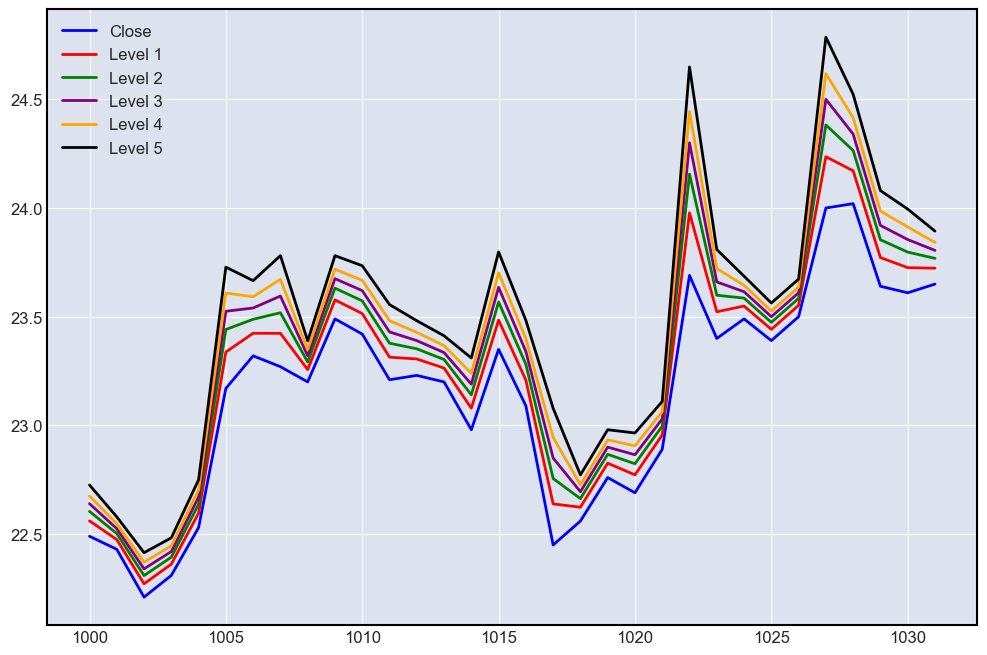

In [102]:
# Calculate the high, low, and close prices
new_data = data[1000:]
high = new_data["high"]
low = new_data["low"]
close = new_data["close"]

# Calculate the 1st and 2nd retracement levels
diff = high - low
level1 = close + (diff * 0.236)
level2 = close + (diff * 0.382)

# Calculate the 3rd, 4th, and 5th retracement levels
level3 = close + (diff * 0.5)
level4 = close + (diff * 0.618)
level5 = close + (diff * 0.786)

# Plot the OHLCV data with the retracement levels
plt.figure(figsize=(12,8))
plt.plot(close, color='blue', label='Close')
plt.plot(level1, color='red', label='Level 1')
plt.plot(level2, color='green', label='Level 2')
plt.plot(level3, color='purple', label='Level 3')
plt.plot(level4, color='orange', label='Level 4')
plt.plot(level5, color='black', label='Level 5')

# plt.xticks = str(new_data.index)
plt.legend(loc='upper left')
plt.show()


In [103]:
import pandas as pd
import numpy as np

'''
Fibonacci Retracements
Fibonacci retracements are used to identify potential levels of support and 
resistance by measuring the size of a price move and then dividing it by the 
key Fibonacci ratios of 23.6%, 38.2%, 50%, 61.8%, and 100%.
'''

# load data
data = data

# define fibonacci levels
levels = [0.0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]

# calculate highest high and lowest low
high = data['high'].max()
low = data['low'].min()

# calculate price range
range_ = high - low

# calculate fibonacci levels
fib_levels = [(level * range_) + low for level in levels]

# identify support and resistance levels
supports = []
resistances = []

for level in fib_levels:
    level_data = data[(data['high'] >= level) & (data['low'] <= level)]
    if len(level_data) > 0:
        resistance = level_data['high'].max()
        support = level_data['low'].min()
        resistances.append(resistance)
        supports.append(support)

# print support and resistance levels
print('Support Levels:', supports)
print('Resistance Levels:', resistances)


Support Levels: [16.0, 17.69, 18.7, 18.92, 20.03, 21.53, 23.84]
Resistance Levels: [16.56, 18.7, 20.46, 21.78, 22.46, 23.24, 24.48]


In [111]:
    # for date in close.index:
    #     idx = close.index.get_loc(date)

close = data['close']
for date in close.index: print(str(date))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [129]:
import numpy as np
import pandas as pd


def get_events(close, h, l, max_holding_period=10):
    """
    Implements the Triple Barrier method for labelling financial data.

    :param close: A pandas series of closing prices.
    :param h: The upper barrier as a positive float or integer.
    :param l: The lower barrier as a negative float or integer.
    :param max_holding_period: The maximum number of days to hold a position.
    :return: A pandas dataframe of labelled events.
    """
    # Compute vertical barrier
    t_events = []
    for date in close.index:
        idx = close.index.get_loc(date)
        try:
            close_price = close.iloc[idx]
            ahead = close.index[idx + 1: idx + max_holding_period + 1]
            events = ahead[(close.loc[ahead] >= close_price * h) | (close.loc[ahead] <= close_price * l)]
            t_events.extend([(date, x) for x in events])
        except IndexError:
            print("Something just happened")
            pass
    t_events = pd.MultiIndex.from_tuples(t_events)
    # Remove duplicated index
    t_events = t_events.to_series().groupby(level=0).first()
    # Compute horizontal barrier
    upper = close * h
    lower = close * l
    # Set vertical barrier
    events = pd.DataFrame({'t1': t_events}, index=t_events)
    prices = pd.DataFrame({'price': close, 'upper': upper, 'lower': lower}, index=close.index)
    events['t1'] = events['t1'].apply(lambda x: prices.index.searchsorted(x))
    # Apply label

    # Calculate returns between t0 and t1
    if not prices.index.is_unique:
        raise ValueError("Index must be unique")
        
    t1 = events['t1'].values
    # t1 = t1[t1 < prices.index[-1]]
    t1 = pd.Series(t1, index=events.index[:len(t1)])

    print(len(t1))
    print(max(t1))
    print(min(t1))
    print(len(prices['price']))
        
    events['pt'] = (prices['price'].iloc[t1].values / prices['price'].values - 1) * 100
    # print(len(prices['price'].values))
    # events['pt'] = (prices['price'].iloc[events['t1'].values].values / prices['price'].values - 1) * 100
    print(events)
    events['target'] = np.where(events['pt'] > 0, 1, -1)
    return events

# Compute labels
events = get_events(data['close'], h=1.02, l=0.98, max_holding_period=10)

# Print events
print(events)

558
1032
1032
1032


IndexError: positional indexers are out-of-bounds

In [177]:
import pandas as pd
import numpy as np
import ta
import yfinance as yf

# Load data
symbol = "AAPL"
start_date = "2020-01-01"
end_date = "2022-05-03"
ohlcv = yf.download(symbol, start=start_date, end=end_date)

# Define parameters
t_final = 10  # final holding period
upper_lower_multipliers = [2, 2]  # multiplier for top/bottom barriers

# Compute daily volatility and moving averages
daily_volatility = ta.volatility.BollingerBands(
    ohlcv["Close"], window=20, window_dev=2
).bollinger_mavg() / np.sqrt(252)

sma = ta.trend.sma_indicator(ohlcv["Close"], window=20)

# Resample OHLCV data to daily frequency
data_daily = ohlcv.resample('D').agg({'Open': 'first',
                                     'High': 'max',
                                     'Low': 'min',
                                     'Close': 'last',
                                     'Volume': 'sum'})

prices = data_daily['Close']


def get_barriers(prices, daily_volatility, t_final, upper_lower_multipliers):
    # create a container
    barriers = pd.DataFrame(
        columns=[
            "days_passed",
            "price",
            "vert_barrier",
            "top_barrier",
            "bottom_barrier",
        ],
        index=daily_volatility.index,
    )
    # vert_barrier = []
    # top_barrier = []
    # bottom_barrier = []

    for day, vol in daily_volatility.iteritems():
        days_passed = len(
            daily_volatility.loc[daily_volatility.index[0] : day]
        )
        # print(days_passed)
        # print("days passed {}".format(days_passed))
        # print("t final {}".format(t_final))
        # set the vertical barrier

        try:
            if (days_passed + t_final < len(daily_volatility.index) and t_final != 0):
                vert_barrier = daily_volatility.index[days_passed + t_final]
                # vert_barrier = (daily_volatility).tolist()[days_passed + t_final]
            else:
                vert_barrier = np.nan

        except:
            print(days_passed)

        # set the top barrier
        if upper_lower_multipliers[0] > 0:
            top_barrier = prices.loc[day] + prices.loc[day] * upper_lower_multipliers[
                0
            ] * vol
        else:
            # set it to NaNs
            top_barrier = pd.Series(index=prices.index)
        # set the bottom barrier
        if upper_lower_multipliers[1] > 0:
            bottom_barrier = prices.loc[day] - prices.loc[day] * upper_lower_multipliers[
                1
            ] * vol
        else:
            # set it to NaNs
            bottom_barrier = pd.Series(index=prices.index)

        barriers.loc[day, ["days_passed", "price", "vert_barrier", "top_barrier", "bottom_barrier"]] = (
            days_passed,
            prices.loc[day],
            vert_barrier,
            top_barrier,
            bottom_barrier,
        )

    return barriers


def get_labels(barriers):
    """
    Assigns labels to each data point based on the triple-barrier method.
    Labels are: 0 (stop loss), 1 (no event), 2 (profit taking).
    """
    barriers["label_barrier"] = None
    for i in range(len(barriers.index)):
        start = barriers.index[i]
        end = barriers.vert_barrier[i]
        if pd.notna(end):

            # # assign the initial and final price
            price_initial = barriers.price[start]
            price_final = barriers.price[end]

            # assign the top and bottom barriers
            top_barrier = barriers.top_barrier[i]
            bottom_barrier = barriers.bottom_barrier[i]

            # print(top_barrier, bottom_barrier)

            # set the profit taking and stop loss conditions
            # condition_pt = (barriers.price[start: end] >= top_barrier).any()
            # condition_sl = (barriers.price[start: end] <= bottom_barrier).any()

            condition_pt = (barriers.price[start: end]).any() >= top_barrier
            condition_sl = (barriers.price[start: end]).any() <= bottom_barrier

            print(condition_pt, condition_sl)
            # assign the labels
            if condition_pt:
                barriers["label_barrier"][i] = 2
            else:
                if condition_sl:
                    barriers["label_barrier"][i] = 0
                else:
                    barriers["label_barrier"][i] = 1
                    
    return barriers


# Use function to produce barriers
barriers = get_barriers(prices, daily_volatility, t_final, upper_lower_multipliers)
# print(barriers.tail(5))
get_labels(barriers)

# Merge the barriers with the main dataset and drop the last t_final + 1 barriers (as they are too close to the end)
# print(barriers.tail(5))
# print(ohlcv.head(5))
# data_ohlcv = ohlcv.merge(barriers[['vert_barrier', 'top_barrier', 'bottom_barrier', 'label_barrier']], left_on='Date', right_on='Date')
# data_ohlcv.drop(data_ohlcv.tail(t_final + 1).index,inplace = True)
# data_ohlcv.tail(5)

print((barriers['label_barrier']).tolist())

[*********************100%***********************]  1 of 1 completed


<ipython-input-177-3325d414c4c2>:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
False False
Fals

In [146]:
bar = (data_ohlcv['label_barrier']).tolist()
print(bar)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

https://github.com/AI4Finance-Foundation/FinRL-Tutorials/blob/master/2-Advance/Crypto_Feature_Importance.ipynb

2.2 Adding Path Dependency: Triple-Barrier Method
To better incorporate the stop-loss and take-profit scenarios of a hypothetical trading strategy, we will modify the fixed-horizon labeling method so that it reflects which barrier has been touched first — upper, lower, or horizon. Hence the name: the triple-barrier method.

The labeling schema is defined as follows:

y = 2 : top barrier is hit first
y = 1 : right barrier is hit first
y = 0 : bottom barrier is hit first
What about the side of the bet?

The schema above works fine for long-only strategies, however things get more complicated when we allow for both long and short bets. If we are betting short, our profit/loss is inverted relative to the price action — we profit if the price goes down and we lose when the price goes up.

In order to account for this, we can simply represent side as 2 for long and 0 for short. Thus we can multiply our returns by the side, so whenever we’re betting short the negative returns become positive and vice-versa. Effectively, we flip the y = 2 and y = 0 labels if side = 0.

Let’s take a shot at the implementation (based on MLDP’s code). First, we define the procedure for getting the timestamps of the horizon barriers:

In [179]:

def get_vol(prices, span=100):
    # 1. compute returns of the form p[t]/p[t-1] - 1
    df0 = prices.pct_change()
    # 2. estimate rolling standard deviation
    df0 = df0.ewm(span=span).std()
    return df0

data_ohlcv = ohlcv.assign(volatility=get_vol(ohlcv.Close)).dropna()
data_ohlcv.head(10)  

,Open,High,Low,Close,Adj Close,Volume,volatility
Date,,,,,,,
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200,0.012509
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,0.009089
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143913,132079200,0.011792
2020-01-09 00:00:00-05:00,76.809998,77.607498,76.550003,77.407501,75.718788,170108400,0.013231
2020-01-10 00:00:00-05:00,77.650002,78.167503,77.062500,77.582497,75.889954,140644800,0.011903
2020-01-13 00:00:00-05:00,77.910004,79.267502,77.787498,79.239998,77.511299,121532000,0.012393
2020-01-14 00:00:00-05:00,79.175003,79.392502,78.042503,78.169998,76.464630,161954400,0.013862
2020-01-15 00:00:00-05:00,77.962502,78.875000,77.387497,77.834999,76.136940,121923600,0.013309
2020-01-16 00:00:00-05:00,78.397499,78.925003,78.022499,78.809998,77.090668,108829200,0.012790


In [181]:
# Create function to obtain the barrier hits
def get_barriers():
  #create a container
  barriers = pd.DataFrame(columns=['days_passed', 
            'price', 'vert_barrier', \
            'top_barrier', 'bottom_barrier'], \
              index = daily_volatility.index)
  for day, vol in daily_volatility.iteritems():
    days_passed = len(daily_volatility.loc \
                  [daily_volatility.index[0] : day])
    #set the vertical barrier 
    if (days_passed + t_final < len(daily_volatility.index) \
        and t_final != 0):
        vert_barrier = daily_volatility.index[
                            days_passed + t_final]
    else:
        vert_barrier = np.nan
    #set the top barrier
    if upper_lower_multipliers[0] > 0:
        top_barrier = prices.loc[day] + prices.loc[day] * \
                      upper_lower_multipliers[0] * vol
    else:
        #set it to NaNs
        top_barrier = pd.Series(index=prices.index)
    #set the bottom barrier
    if upper_lower_multipliers[1] > 0:
        bottom_barrier = prices.loc[day] - prices.loc[day] * \
                      upper_lower_multipliers[1] * vol
    else: 
        #set it to NaNs
        bottom_barrier = pd.Series(index=prices.index)
        
    barriers.loc[day, ['days_passed', 'price', 'vert_barrier','top_barrier', 'bottom_barrier']] = \
    days_passed, prices.loc[day], vert_barrier, top_barrier, bottom_barrier

  return barriers

# Set barrier parameters

daily_volatility = data_ohlcv['volatility']
t_final = 25
upper_lower_multipliers = [2, 2]
price = data_ohlcv['Close']
prices = price[daily_volatility.index]

barriers = get_barriers()
barriers

<ipython-input-181-abc5e1b8946c>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, vol in daily_volatility.iteritems():


,days_passed,price,vert_barrier,top_barrier,bottom_barrier
Date,,,,,
2020-01-06 00:00:00-05:00,1,74.949997,2020-02-12 00:00:00-05:00,76.825084,73.07491
2020-01-07 00:00:00-05:00,2,74.597504,2020-02-13 00:00:00-05:00,75.953563,73.241444
2020-01-08 00:00:00-05:00,3,75.797501,2020-02-14 00:00:00-05:00,77.585053,74.009948
2020-01-09 00:00:00-05:00,4,77.407501,2020-02-18 00:00:00-05:00,79.455833,75.35917
2020-01-10 00:00:00-05:00,5,77.582497,2020-02-19 00:00:00-05:00,79.42941,75.735583
...,...,...,...,...,...
2022-04-26 00:00:00-04:00,582,156.800003,NaN,162.541197,151.058809
2022-04-27 00:00:00-04:00,583,156.570007,NaN,162.245795,150.89422
2022-04-28 00:00:00-04:00,584,163.639999,NaN,169.880593,157.399406


2.3 Function to get label for the dataset (0, 1, 2)
<ul>
<li>0: hit the stoploss
<li>1: hit the time out
<li>2: hit the profit take
</ul>
The part in this function (commented out), allows for easy conversion to a regression analysis (currently it is classification). If one changes the labels to (-1, 0, 1), and change the hit on the vertical barrier to the function stated below.

That will make hitting the profit take barrier 1, the vertical barrier a range from (-1, 1), and the stoploss barrier -1. This is a continuos space then.

barriers['out'][i] = max(
          [(price_final - price_initial)/ 
            (top_barrier - price_initial), \
            (price_final - price_initial)/ \
            (price_initial - bottom_barrier)],\
            key=abs)

In [182]:
def get_labels():
  '''
  start: first day of the window
  end:last day of the window
  price_initial: first day stock price
  price_final:last day stock price
  top_barrier: profit taking limit
  bottom_barrier:stop loss limt
  condition_pt:top_barrier touching conditon
  condition_sl:bottom_barrier touching conditon
  '''

  barriers["label_barrier"] = None
  for i in range(len(barriers.index)):
    start = barriers.index[i]
    end = barriers.vert_barrier[i]
    if pd.notna(end):

        # assign the initial and final price
        price_initial = barriers.price[start]
        price_final = barriers.price[end]

        # assign the top and bottom barriers
        top_barrier = barriers.top_barrier[i]
        bottom_barrier = barriers.bottom_barrier[i]

        #set the profit taking and stop loss conditons
        condition_pt = (barriers.price[start: end] >= \
          top_barrier).any()
        condition_sl = (barriers.price[start: end] <= \
          bottom_barrier).any()

        #assign the labels
        if condition_pt: 
            barriers['label_barrier'][i] = 2
        elif condition_sl: 
            barriers['label_barrier'][i] = 0    
        else: 

          # Change to regression analysis by switching labels (-1, 0, 1)
          # and uncommenting the alternative function for vert barrier

          barriers['label_barrier'][i] = 1
            # barriers['label_barrier'][i] = max(
            #           [(price_final - price_initial)/ 
            #             (top_barrier - price_initial), \
            #             (price_final - price_initial)/ \
            #             (price_initial - bottom_barrier)],\
            #             key=abs)

  return


In [186]:

# Use function to produce barriers

get_labels()
barriers

# Merge the barriers with the main dataset and drop the last t_final + 1 barriers (as they are too close to the end)

data_ohlcv = data_ohlcv.merge(barriers[['vert_barrier', 'top_barrier', 'bottom_barrier', 'label_barrier']], left_on='Date', right_on='Date')
data_ohlcv.drop(data_ohlcv.tail(t_final + 1).index,inplace = True)
data_ohlcv.tail(25)

,Open,High,Low,Close,Adj Close,Volume,volatility,vert_barrier_x,top_barrier_x,bottom_barrier_x,label_barrier_x,vert_barrier_y,top_barrier_y,bottom_barrier_y,label_barrier_y,vert_barrier,top_barrier,bottom_barrier,label_barrier
Date,,,,,,,,,,,,,,,,,,,
2021-12-03 00:00:00-05:00,164.020004,164.960007,159.720001,161.839996,160.660812,118023100,0.013729,2022-01-11 00:00:00-05:00,166.283898,157.396095,2,2022-01-11 00:00:00-05:00,166.283898,157.396095,2,2022-01-11 00:00:00-05:00,166.283898,157.396095,2
2021-12-06 00:00:00-05:00,164.289993,167.880005,164.279999,165.320007,164.115479,107497000,0.013867,2022-01-12 00:00:00-05:00,169.904889,160.735126,2,2022-01-12 00:00:00-05:00,169.904889,160.735126,2,2022-01-12 00:00:00-05:00,169.904889,160.735126,2
2021-12-07 00:00:00-05:00,169.080002,171.580002,168.339996,171.179993,169.932755,120405400,0.014492,2022-01-13 00:00:00-05:00,176.141462,166.218523,2,2022-01-13 00:00:00-05:00,176.141462,166.218523,2,2022-01-13 00:00:00-05:00,176.141462,166.218523,2
2021-12-08 00:00:00-05:00,172.130005,175.960007,170.699997,175.080002,173.804382,116998900,0.014614,2022-01-14 00:00:00-05:00,180.197186,169.962818,2,2022-01-14 00:00:00-05:00,180.197186,169.962818,2,2022-01-14 00:00:00-05:00,180.197186,169.962818,2
2021-12-09 00:00:00-05:00,174.910004,176.750000,173.919998,174.559998,173.288162,108923700,0.014495,2022-01-18 00:00:00-05:00,179.620654,169.499341,2,2022-01-18 00:00:00-05:00,179.620654,169.499341,2,2022-01-18 00:00:00-05:00,179.620654,169.499341,2
2021-12-10 00:00:00-05:00,175.210007,179.630005,174.690002,179.449997,178.142532,115402700,0.014765,2022-01-19 00:00:00-05:00,184.749152,174.150842,0,2022-01-19 00:00:00-05:00,184.749152,174.150842,0,2022-01-19 00:00:00-05:00,184.749152,174.150842,0
2021-12-13 00:00:00-05:00,181.119995,182.130005,175.529999,175.740005,174.459564,153237000,0.015012,2022-01-20 00:00:00-05:00,181.016326,170.463685,2,2022-01-20 00:00:00-05:00,181.016326,170.463685,2,2022-01-20 00:00:00-05:00,181.016326,170.463685,2
2021-12-14 00:00:00-05:00,175.250000,177.740005,172.210007,174.330002,173.059845,139380400,0.014946,2022-01-21 00:00:00-05:00,179.540964,169.119039,2,2022-01-21 00:00:00-05:00,179.540964,169.119039,2,2022-01-21 00:00:00-05:00,179.540964,169.119039,2
2021-12-15 00:00:00-05:00,175.110001,179.500000,172.309998,179.300003,177.993607,131063300,0.015222,2022-01-24 00:00:00-05:00,184.758483,173.841523,0,2022-01-24 00:00:00-05:00,184.758483,173.841523,0,2022-01-24 00:00:00-05:00,184.758483,173.841523,0


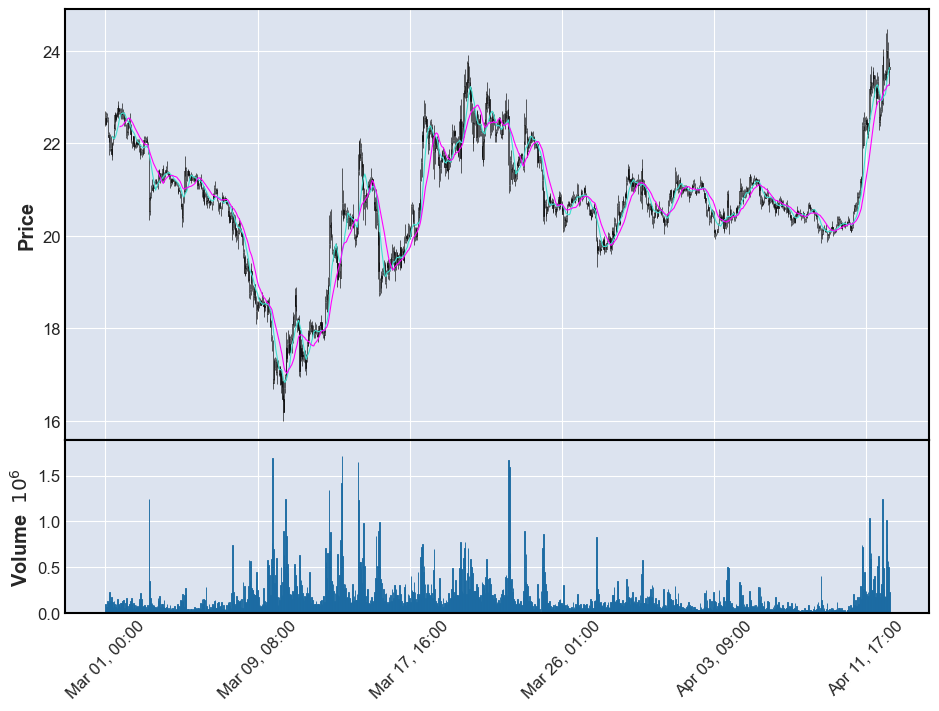

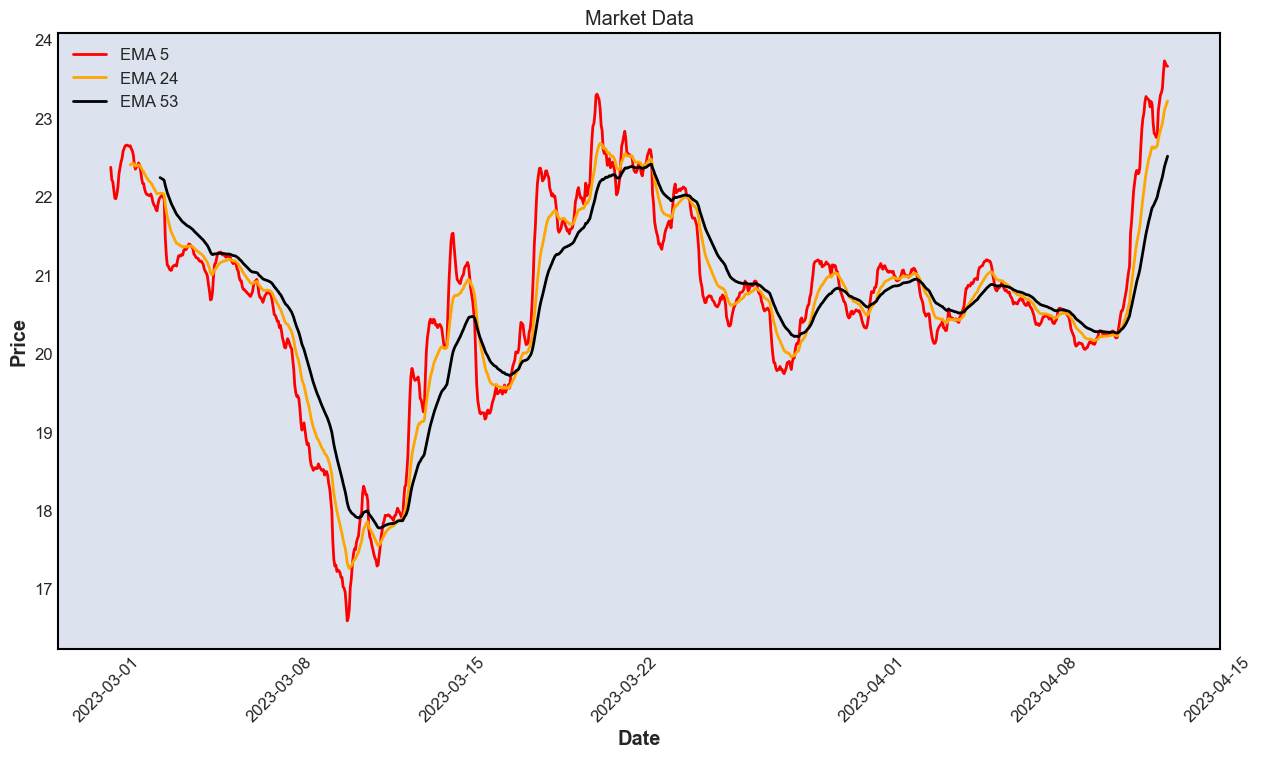

In [72]:
#plot the outcome

import pandas as pd
import matplotlib.pyplot as plt
# from mpl_finance import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mdates
from talib import EMA

# Load OHLCV data into a Pandas DataFrame
# df = pd.read_csv('ohlc_data.csv', parse_dates=True, index_col=0)
df = data

# Calculate exponential moving averages
df['EMA_5'] = EMA(df['close'], timeperiod=5)
df['EMA_24'] = EMA(df['close'], timeperiod=24)
df['EMA_53'] = EMA(df['close'], timeperiod=53)

# Prepare the data for plotting
# df_ohlc = df[['open', 'high', 'low', 'close']].resample('1D').ohlc()
# df_volume = df['volume'].resample('1D').sum()
# df_ohlc.reset_index(inplace=True)
# # df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)

# Create the plot
# fig, ax = plt.subplots()
# candlestick_ohlc(ax, df_ohlc.values, width=0.6, colorup='g', colordown='r', alpha=1.0)
mpf.plot(df,type='candle',volume=True,mav=(10,20),figscale=1.5,warn_too_much_data=2000)
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.figure(figsize=(15,8))

plt.xticks(rotation=45)
plt.title('Market Data')
plt.ylabel('Price')
plt.xlabel('Date')

# Add EMA lines
plt.plot(df.index, df['EMA_5'], label='EMA 5', color='red')
plt.plot(df.index, df['EMA_24'], label='EMA 24', color='orange')
plt.plot(df.index, df['EMA_53'], label='EMA 53', color='black')

# Customize the plot
plt.legend()
plt.grid()
plt.show()


In [73]:
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, normal_length, slow_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    normal_length = int(normal_length)
    # Define strategy
    class EMAStrategy(bt.Strategy):
        params = (
            ('leverage', 1), # leverage parameter
            ('margin', None), # margin parameter
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.fast_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=fast_length)
            self.normal_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=normal_length)
            self.slow_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=slow_length)
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if (self.fast_ema > self.normal_ema) and (self.normal_ema > self.slow_ema):
                    # Buy signal
                    self.buy(size=self.params.starting_cash * self.params.leverage / self.data.close[0], exectype=bt.Order.Market, margin=self.params.margin)
    
            else:
                if (self.fast_ema < self.normal_ema) or (self.normal_ema < self.slow_ema):
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size, exectype=bt.Order.Market)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(EMAStrategy, leverage=2, margin=1000) # leverage and margin parameters
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit
# , so we negate it for minimization



# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 10),
    'slow_length': (50, 99),
    'normal_length': (15, 50)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=100, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_normal_length = int(optimal_params['normal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Normal Length: {}'.format(optimal_normal_length))


|   iter    |  target   | fast_l... | normal... | slow_l... |
-------------------------------------------------------------
| 1         | 0.0       | 6.968     | 22.22     | 72.34     |
| 2         | 0.0       | 5.874     | 48.42     | 64.51     |
| 3         | 0.0       | 6.224     | 20.46     | 59.52     |
| 4         | 0.0       | 5.862     | 40.49     | 84.19     |
| 5         | 0.0       | 7.239     | 38.02     | 80.26     |
| 6         | 0.0       | 6.426     | 20.9      | 54.06     |
| 7         | 0.0       | 7.054     | 27.73     | 79.68     |
| 8         | 0.0       | 5.163     | 33.32     | 85.99     |
| 9         | 0.0       | 5.376     | 16.28     | 53.36     |
| 10        | 0.0       | 8.726     | 24.18     | 91.5      |
| 11        | 0.0       | 5.042     | 46.08     | 58.21     |
| 12        | 0.0       | 7.913     | 45.88     | 63.15     |
| 13        | 0.0       | 7.25      | 47.89     | 71.59     |
| 14        | 0.0       | 7.903     | 47.9      | 60.91     |
| 15    

In [14]:
from scipy.optimize import differential_evolution
from skopt import gp_minimize

# Define objective function
def objective(params):
    fast_length, slow_length, signal_length = params
    
    # Define strategy
    class MACDStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.macd = bt.indicators.MACD(
                period_me1=int(fast_length),
                period_me2=int(slow_length),
                period_signal=int(signal_length)
            )
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if self.macd.lines.macd[0] > self.macd.lines.signal[0]:
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if self.macd.lines.macd[0] < self.macd.lines.signal[0] or \
                        self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(MACDStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return -profit  # Objective is to maximize profit, so we negate it for minimization


# Define parameter bounds
bounds = [(5, 20), (20, 40), (5, 15)]  # bounds for fast length, slow length, signal length

# Initial parameter values
# x0 = np.array([12, 26, 9])  # initial values for fast length, slow length, signal length
x0 = np.array([6, 30, 5])  # initial values for fast length, slow length, signal length

# Define integer constraints
# integers = [0, 1, 2]

# Define differential evolution solver
solver = 'differential_evolution'

# # Run optimization
# result = differential_evolution(objective, bounds, strategy=solver, init='random', mutation=(0.5, 1), 
#                                 recombination=0.7, seed=0, tol=1e-6, atol=1e-8, polish=False, 
#                                 maxiter=100, popsize=15, updating='deferred', workers=1, constraints=integers)

# # Run optimization
# result = differential_evolution(objective, bounds, strategy='best1bin', init='random', mutation=(0.5, 1), 
#                                 recombination=0.7, seed=0, tol=1e-6, atol=1e-8, polish=False, 
#                                 maxiter=100, popsize=15, updating='deferred', workers=1, constraints=integers)

# Define custom constraint handler
def is_integer(x):
    """Check if x is an integer."""
    return np.equal(np.mod(x, 1), 0)

def constraint_handler(x):
    """Enforce integer constraints."""
    return np.array([x[0], x[1], x[2]]) - np.array([is_integer(x[0]), is_integer(x[1]), is_integer(x[2])])

# Run optimization
result = differential_evolution(objective, bounds, strategy='best1bin', init='random', mutation=(0.5, 1), 
                                recombination=0.7, seed=0, tol=1e-6, atol=1e-8, polish=False, 
                                maxiter=100, popsize=15, updating='deferred', workers=1)

# Extract optim

# Minimize the objective function
# result = minimize(objective, x0, bounds=bounds, options={'integer_tol': 1e-9})
# , method='trust-constr'
# try Bayesian Optimization

# Extract optimal parameter values and profit
optimal_fast_length, optimal_slow_length, optimal_signal_length = result.x
optimal_profit = -result.fun

# Print optimal parameter values and profit
print("Optimal MACD Fast Length:", int(optimal_fast_length))
print("Optimal MACD Slow Length:", int(optimal_slow_length))
print("Optimal MACD Signal Length:", int(optimal_signal_length))
print("Optimal Profit:", optimal_profit)

Optimal MACD Fast Length: 7
Optimal MACD Slow Length: 28
Optimal MACD Signal Length: 5
Optimal Profit: -62.19458018658406


In [22]:
!pip install colorama==0.4.4
!pip install bayesian-optimization==1.4.0

  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.6
    Uninstalling colorama-0.4.6:
      Successfully uninstalled colorama-0.4.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylint 2.7.4 requires astroid<2.7,>=2.5.2, but you have astroid 2.5 which is incompatible.
bayesian-optimization 1.4.2 requires colorama>=0.4.6, but you have colorama 0.4.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached bayesian_optimization-1.4.0-py3-none-any.whl (17 kB)
  Attempting uninstall: bayesian-optimization
    Found existing installation: bayesian-optimization 1.4.2
    Uninstalling bayesian-optimization-1.4.2:
      Successfully uninstalled bayesian-optimization-1.4.2



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29105 sha256=c63772da949b5bbe564df89da3dfd31ec4e6eadc2d418762af80167d9ddd0bfc
  Stored in directory: c:\users\kenny\appdata\local\pip\cache\wheels\45\06\ca\92c1cdaf57f0c88b2832cc67cea98beeea9fc5d2e5310dfcc2
Successfully built ta



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from scipy.optimize import differential_evolution
from bayes_opt import BayesianOptimization

# Define objective function
# Define objective function for Bayesian optimization
def objective(fast_length, slow_length, signal_length):
    # Convert parameters to integer values
    fast_length = int(fast_length)
    slow_length = int(slow_length)
    signal_length = int(signal_length)
    # Define strategy
    class MACDStrategy(bt.Strategy):
        params = (
            ('starting_cash', 10000),
        )
    
        def __init__(self):
            self.macd = bt.indicators.MACD(
                period_me1=int(fast_length),
                period_me2=int(slow_length),
                period_signal=int(signal_length)
            )
            self.stop_loss_pct = 0.02  # 2% stop loss threshold
    
        def next(self):
            if not self.position:
                if self.macd.lines.macd[0] > self.macd.lines.signal[0]:
                    # Buy signal
                    self.buy(size=self.params.starting_cash / self.data.close[0])
    
            else:
                if self.macd.lines.macd[0] < self.macd.lines.signal[0]:
                # or \
                        # self.data.close[0] < self.position.price * (1 - self.stop_loss_pct):
                    # Sell signal or stop loss triggered
                    self.sell(size=self.position.size)
    
    cerebro = bt.Cerebro()
    
    # Add data to cerebro
    cerebro.adddata(bt.feeds.PandasData(dataname=data))
    
    # Add strategy to cerebro
    cerebro.addstrategy(MACDStrategy)
    
    # Set starting capital
    cerebro.broker.setcash(10000)
    
    # Run backtest
    results = cerebro.run()
    profit = results[0].broker.getvalue() - 10000

    # print(params)
    # print(profit)
    
    return profit  # Objective is to maximize profit
# , so we negate it for minimization



# Define parameter bounds for Bayesian optimization
bounds = {
    'fast_length': (5, 30),
    'slow_length': (10, 60),
    'signal_length': (5, 30)
}

# Perform Bayesian optimization
opt = BayesianOptimization(objective, bounds)
opt.maximize(n_iter=100, init_points=50)

# Extract optimal parameters
optimal_params = opt.max['params']
optimal_fast_length = int(optimal_params['fast_length'])
optimal_slow_length = int(optimal_params['slow_length'])
optimal_signal_length = int(optimal_params['signal_length'])
optimal_profit = float(opt.max['target'])

# Print optimal parameters
print('Optimal Parameters:')
print('Fast Length: {}'.format(optimal_fast_length))
print('Slow Length: {}'.format(optimal_slow_length))
print('Signal Length: {}'.format(optimal_signal_length))
print("Optimal Profit:", optimal_profit)


|   iter    |  target   | fast_l... | signal... | slow_l... |
-------------------------------------------------------------
| 1         | -103.7    | 28.55     | 12.62     | 25.32     |
| 2         | -599.8    | 8.468     | 8.869     | 50.1      |
| 3         | -354.5    | 17.93     | 26.35     | 47.51     |
| 4         | -354.5    | 27.61     | 23.22     | 39.32     |
| 5         | -178.1    | 5.001     | 23.09     | 38.02     |
| 6         | -187.3    | 17.34     | 9.673     | 51.03     |
| 7         | -173.2    | 14.33     | 15.07     | 46.49     |
| 8         | -259.1    | 25.2      | 13.23     | 48.87     |
| 9         | -164.8    | 25.62     | 6.92      | 10.02     |
| 10        | 0.0       | 10.04     | 10.49     | 10.41     |
| 11        | -178.5    | 28.47     | 18.32     | 17.24     |
| 12        | -685.1    | 15.64     | 16.13     | 17.95     |
| 13        | -146.0    | 16.28     | 17.31     | 55.61     |
| 14        | -146.0    | 28.29     | 9.119     | 57.96     |
| 15    

In [2]:
data.head(5)

NameError: name 'data' is not defined

In [ ]:
# Feature Engineering
# https://www.relataly.com/feature-engineering-for-multivariate-time-series-models-with-python/1813/
# Indexing Batches
train_df = df.sort_values(by=['Date']).copy()

# Adding Month and Year in separate columns
d = pd.to_datetime(train_df.index)
train_df['Day'] = d.strftime("%d") 
train_df['Month'] = d.strftime("%m") 
train_df['Year'] = d.strftime("%Y") 
train_df


def createFeatures(df):
    df = pd.DataFrame(df)

    
    df['Close_Diff'] = df['Adj Close'].diff()
        
    # Moving averages - different periods
    df['MA200'] = df['Close'].rolling(window=200).mean() 
    df['MA100'] = df['Close'].rolling(window=100).mean() 
    df['MA50'] = df['Close'].rolling(window=50).mean() 
    df['MA26'] = df['Close'].rolling(window=26).mean() 
    df['MA20'] = df['Close'].rolling(window=20).mean() 
    df['MA12'] = df['Close'].rolling(window=12).mean() 
    
    # SMA Differences - different periods
    df['DIFF-MA200-MA50'] = df['MA200'] - df['MA50']
    df['DIFF-MA200-MA100'] = df['MA200'] - df['MA100']
    df['DIFF-MA200-CLOSE'] = df['MA200'] - df['Close']
    df['DIFF-MA100-CLOSE'] = df['MA100'] - df['Close']
    df['DIFF-MA50-CLOSE'] = df['MA50'] - df['Close']
    
    # Moving Averages on high, lows, and std - different periods
    df['MA200_low'] = df['Low'].rolling(window=200).min()
    df['MA14_low'] = df['Low'].rolling(window=14).min()
    df['MA200_high'] = df['High'].rolling(window=200).max()
    df['MA14_high'] = df['High'].rolling(window=14).max()
    df['MA20dSTD'] = df['Close'].rolling(window=20).std() 
    
    # Exponential Moving Averages (EMAS) - different periods
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
    df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

    # Shifts (one day before and two days before)
    df['close_shift-1'] = df.shift(-1)['Close']
    df['close_shift-2'] = df.shift(-2)['Close']

    # Bollinger Bands
    df['Bollinger_Upper'] = df['MA20'] + (df['MA20dSTD'] * 2)
    df['Bollinger_Lower'] = df['MA20'] - (df['MA20dSTD'] * 2)
    
    # Relative Strength Index (RSI)
    df['K-ratio'] = 100*((df['Close'] - df['MA14_low']) / (df['MA14_high'] - df['MA14_low']) )
    df['RSI'] = df['K-ratio'].rolling(window=3).mean() 

    # Moving Average Convergence/Divergence (MACD)
    df['MACD'] = df['EMA12'] - df['EMA26']
    
    # Replace nas 
    nareplace = df.at[df.index.max(), 'Close']    
    df.fillna((nareplace), inplace=True)
    
    return df


# https://kernc.github.io/backtesting.py/doc/examples/Trading%20with%20Machine%20Learning.html

# code extract_features from market data and also obtain the 48 price...to train a ML model

def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

data = data.dropna().astype(float)

import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [ ]:
# Plot line charts
df_plot = df.copy()

ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

# check the close data and see if it is necessary to filter the noise - Kalman filter or Gaussian filter

In [ ]:
import pandas as pd
import numpy as np
import random

# Load historical stock data with technical indicators as features
df = pd.read_csv('stock_data.csv')

# Define the state space
window_size = 10  # Number of days to consider for each state
n_features = 10  # Number of technical indicators as features
state_size = window_size * n_features  # Total number of values in each state
n_actions = 3  # Number of possible actions (buy, sell, or hold)

# Define the Q-learning algorithm
n_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1
Q = np.zeros((state_size, n_actions))

for episode in range(n_episodes):
    state = np.zeros(state_size)  # Start with an empty state
    done = False
    while not done:
        # Choose an action based on the current state and exploration strategy
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q[state, :])

        # Calculate the reward for the action taken and the new state
        next_state = np.concatenate([state[n_features:], df.iloc[window_size][1:].values])
        reward = 0
        if action == 0:  # Buy
            reward = df.iloc[window_size]['Close'] - df.iloc[window_size-1]['Close']
        elif action == 1:  # Sell
            reward = df.iloc[window_size-1]['Close'] - df.iloc[window_size]['Close']
        else:  # Hold
            reward = 0

        # Update the Q-value for the current state-action pair
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        # Update the state
        state = next_state

        # Check if done
        if len(df) - window_size <= np.argmax(state) or np.random.random() < 0.05:
            done = True

# Use the learned Q-values to determine the best trading actions
state = np.zeros(state_size)  # Start with an empty state
done = False
while not done:
    action = np.argmax(Q[state, :])
    if action == 0:  # Buy
        print(f"Buy at {df.iloc[window_size]['Close']}")
    elif action == 1:  # Sell
        print(f"Sell at {df.iloc[window_size]['Close']}")
    else:  # Hold
        print("Hold")
    next_state = np.concatenate([state[n_features:], df.iloc[window_size][1:].values])
    state = next_state
    if len(df) - window_size <= np.argmax(state) or np.random.random() < 0.05:
        done = True
